In [ ]:
# prompt: mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/vijay-0107/quantum_ml_classifier.git

Cloning into 'quantum_ml_classifier'...
remote: Enumerating objects: 5651, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 5651 (delta 17), reused 42 (delta 10), pack-reused 5602
Receiving objects: 100% (5651/5651), 77.74 MiB | 6.44 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Updating files: 100% (5651/5651), done.


In [ ]:
!pip install opencv-python

In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 16.5 MB/s eta 0:00:00


In [ ]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 59.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os
import cv2
import random
import pennylane as qml
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.circuit import Parameter
from qiskit.visualization import plot_bloch_multivector
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pennylane.templates import RandomLayers
from google.colab.patches import cv2_imshow
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
import torch

In [ ]:
SAVE_PATH_1 = "/content/quantum_ml_classifier/Encoded_data/size_28/"
SAVE_PATH_2 = "/content/drive/MyDrive/BTP/Encoded_data/size_28/"

In [ ]:
# Check if GPU is available, if not, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('cpu')

print(device)


cuda


In [ ]:
train_color_images = np.load(SAVE_PATH_1 + "train_color_images.npy")
test_color_images = np.load(SAVE_PATH_1 + "test_color_images.npy")
train_label = np.load(SAVE_PATH_1 + "train_label.npy")
test_label = np.load(SAVE_PATH_1 + "test_label.npy")

#Calculate_Metrics

In [ ]:
def calculate_classification_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return f1, precision, recall, accuracy

def calculate_t_score_and_p_value(array1, array2):
    t_stat, p_value = ttest_rel(array1, array2)
    return t_stat, p_value

#BasicNN6

In [ ]:
def MyModel6():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(128, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN5

In [ ]:
def MyModel5():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN4

In [ ]:
def MyModel4():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN3

In [ ]:
def MyModel3():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(32, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(16, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN2

In [ ]:
def MyModel2():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN1

In [ ]:
def MyModel1():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(8, activation="softplus"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#BasicNN

In [ ]:
def MyModel():
    """Initializes and returns a custom Keras model
    which is ready to be trained."""
    model = keras.models.Sequential([
        keras.layers.Flatten(),
        keras.layers.Dense(4, activation="softmax")
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#CNN

In [ ]:
# Define your CNN model function
def MyCNNModel():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='softplus', input_shape=(28, 28, 3)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(64, (3, 3), activation='softplus'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(128, (3, 3), activation='softplus'),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='softplus'),
        keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

#ResNET 50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model

def MyResNet50Model(input_shape=(224, 224, 3), num_classes=1000):
    # Load ResNet50 architecture with pre-trained weights from ImageNet
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze the pre-trained layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom classification head
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(512, activation='softplus')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Combine the base model with custom classification head
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    return model


#SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def MySVMModel():
    """Initializes and returns a custom SVM model."""
    # Create an SVM classifier with a linear kernel
    svm_classifier = SVC(kernel='linear', probability=True)

    # Create a pipeline with scaling and the SVM classifier
    model = make_pipeline(StandardScaler(), svm_classifier)

    return model


#Comparision Graph

In [ ]:
def plot_comparison(q_history, c_history):
    plt.style.use("seaborn")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9, 12))

    ax1.plot(q_history.history["val_accuracy"], "-ob", label="With quantum layer")
    ax1.plot(c_history.history["val_accuracy"], "-og", label="Without quantum layer")
    ax1.set_ylabel("Accuracy")
    ax1.set_ylim([0, 1])
    ax1.set_xlabel("Epoch")
    ax1.legend()

    ax2.plot(q_history.history["val_loss"], "-ob", label="With quantum layer")
    ax2.plot(c_history.history["val_loss"], "-og", label="Without quantum layer")
    ax2.set_ylabel("Loss")
    ax2.set_ylim(top=2.5)
    ax2.set_xlabel("Epoch")
    ax2.legend()
    plt.tight_layout()
    plt.show()

#Classic


##Basic_NN6

In [ ]:
c_model_NN6 = MyModel6()

n_epochs = 75

c_history_NN6 = c_model_NN6.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 8s - loss: 1.2565 - accuracy: 0.3912 - val_loss: 0.7972 - val_accuracy: 0.5320 - 8s/epoch - 12ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9118 - accuracy: 0.4776 - val_loss: 0.7697 - val_accuracy: 0.6280 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 3s - loss: 0.7791 - accuracy: 0.5736 - val_loss: 0.6177 - val_accuracy: 0.6840 - 3s/epoch - 5ms/step
Epoch 4/75
625/625 - 3s - loss: 0.6970 - accuracy: 0.6308 - val_loss: 0.5264 - val_accuracy: 0.6720 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6681 - accuracy: 0.6384 - val_loss: 0.6131 - val_accuracy: 0.6460 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6324 - accuracy: 0.6456 - val_loss: 0.5224 - val_accuracy: 0.6840 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6318 - accuracy: 0.6532 - val_loss: 0.5196 - val_accuracy: 0.6500 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6214 - accuracy: 0.6720 - val_loss: 0.5641 - val_accuracy: 0.6680 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s

In [ ]:
c_y_pred_NN6 = np.argmax(c_model_NN6.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN6, c_precision_NN6, c_recall_NN6, c_accuracy_NN6 = calculate_classification_metrics(test_label, c_y_pred_NN6)
print("F1 Score:", c_f1_NN6)
print("Precision:", c_precision_NN6)
print("Recall:", c_recall_NN6)
print("Accuracy:", c_accuracy_NN6)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.8283747078891922
Precision: 0.8694439866463827
Recall: 0.834
Accuracy: 0.834


##Basic_NN5

In [ ]:
c_model_NN5 = MyModel5()

n_epochs = 75

c_history_NN5 = c_model_NN5.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 6s - loss: 1.2392 - accuracy: 0.4412 - val_loss: 0.8911 - val_accuracy: 0.5500 - 6s/epoch - 10ms/step
Epoch 2/75
625/625 - 4s - loss: 0.9900 - accuracy: 0.5156 - val_loss: 0.7660 - val_accuracy: 0.5940 - 4s/epoch - 6ms/step
Epoch 3/75
625/625 - 4s - loss: 0.8283 - accuracy: 0.5732 - val_loss: 0.6398 - val_accuracy: 0.6220 - 4s/epoch - 6ms/step
Epoch 4/75
625/625 - 4s - loss: 0.7171 - accuracy: 0.5996 - val_loss: 0.6336 - val_accuracy: 0.7420 - 4s/epoch - 7ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6931 - accuracy: 0.6176 - val_loss: 0.5653 - val_accuracy: 0.6500 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6704 - accuracy: 0.6192 - val_loss: 0.5681 - val_accuracy: 0.7020 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6606 - accuracy: 0.6304 - val_loss: 0.5727 - val_accuracy: 0.6980 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 3s - loss: 0.6178 - accuracy: 0.6404 - val_loss: 0.5192 - val_accuracy: 0.8040 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s

In [ ]:
c_y_pred_NN5 = np.argmax(c_model_NN5.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN5, c_precision_NN5, c_recall_NN5, c_accuracy_NN5 = calculate_classification_metrics(test_label, c_y_pred_NN5)
print("F1 Score:", c_f1_NN5)
print("Precision:", c_precision_NN5)
print("Recall:", c_recall_NN5)
print("Accuracy:", c_accuracy_NN5)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.8417147317522347
Precision: 0.8767546956200747
Recall: 0.846
Accuracy: 0.846


##Basic_NN4

In [ ]:
c_model_NN4 = MyModel4()

n_epochs = 75

c_history_NN4 = c_model_NN4.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.9781 - accuracy: 0.4700 - val_loss: 0.6768 - val_accuracy: 0.7220 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7586 - accuracy: 0.5876 - val_loss: 0.5727 - val_accuracy: 0.6500 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7059 - accuracy: 0.6132 - val_loss: 0.5339 - val_accuracy: 0.6520 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6597 - accuracy: 0.6492 - val_loss: 0.5396 - val_accuracy: 0.7000 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6218 - accuracy: 0.6732 - val_loss: 0.5300 - val_accuracy: 0.8020 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6254 - accuracy: 0.6504 - val_loss: 0.5201 - val_accuracy: 0.7920 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6168 - accuracy: 0.6688 - val_loss: 0.6671 - val_accuracy: 0.5980 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6009 - accuracy: 0.6836 - val_loss: 0.4994 - val_accuracy: 0.8220 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN4 = np.argmax(c_model_NN4.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN4, c_precision_NN4, c_recall_NN4, c_accuracy_NN4 = calculate_classification_metrics(test_label, c_y_pred_NN4)
print("F1 Score:", c_f1_NN4)
print("Precision:", c_precision_NN4)
print("Recall:", c_recall_NN4)
print("Accuracy:", c_accuracy_NN4)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.8460620872168653
Precision: 0.8695067368107842
Recall: 0.848
Accuracy: 0.848


##Basic_NN3

In [ ]:
c_model_NN3 = MyModel3()

n_epochs = 75

c_history_NN3 = c_model_NN3.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.0946 - accuracy: 0.4436 - val_loss: 0.8038 - val_accuracy: 0.5680 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8376 - accuracy: 0.5320 - val_loss: 0.6379 - val_accuracy: 0.7820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7673 - accuracy: 0.5704 - val_loss: 0.6056 - val_accuracy: 0.6440 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7002 - accuracy: 0.6216 - val_loss: 0.5635 - val_accuracy: 0.6740 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6489 - accuracy: 0.6628 - val_loss: 0.5470 - val_accuracy: 0.7800 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6355 - accuracy: 0.6668 - val_loss: 0.5252 - val_accuracy: 0.7940 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6065 - accuracy: 0.6968 - val_loss: 0.5497 - val_accuracy: 0.7220 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5796 - accuracy: 0.6992 - val_loss: 0.5486 - val_accuracy: 0.7800 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
c_y_pred_NN3 = np.argmax(c_model_NN3.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN3, c_precision_NN3, c_recall_NN3, c_accuracy_NN3 = calculate_classification_metrics(test_label, c_y_pred_NN3)
print("F1 Score:", c_f1_NN3)
print("Precision:", c_precision_NN3)
print("Recall:", c_recall_NN3)
print("Accuracy:", c_accuracy_NN3)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.870424271996101
Precision: 0.8752817099686752
Recall: 0.87
Accuracy: 0.87


##Basic_NN2

In [ ]:
c_model_NN2 = MyModel2()

n_epochs = 75

c_history_NN2 = c_model_NN2.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.9951 - accuracy: 0.4892 - val_loss: 0.8006 - val_accuracy: 0.6740 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7958 - accuracy: 0.5644 - val_loss: 0.6100 - val_accuracy: 0.6600 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7260 - accuracy: 0.5948 - val_loss: 0.6629 - val_accuracy: 0.7780 - 2s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6812 - accuracy: 0.6280 - val_loss: 0.5308 - val_accuracy: 0.7160 - 2s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6399 - accuracy: 0.6412 - val_loss: 0.4970 - val_accuracy: 0.7720 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6155 - accuracy: 0.6632 - val_loss: 0.4975 - val_accuracy: 0.6600 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6137 - accuracy: 0.6584 - val_loss: 0.4961 - val_accuracy: 0.6680 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5917 - accuracy: 0.6836 - val_loss: 0.5127 - val_accuracy: 0.8200 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN2 = np.argmax(c_model_NN2.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN2, c_precision_NN2, c_recall_NN2, c_accuracy_NN2 = calculate_classification_metrics(test_label, c_y_pred_NN2)
print("F1 Score:", c_f1_NN2)
print("Precision:", c_precision_NN2)
print("Recall:", c_recall_NN2)
print("Accuracy:", c_accuracy_NN2)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.8226459853291163
Precision: 0.8598363280336685
Recall: 0.83
Accuracy: 0.83


##Basic_NN1

In [ ]:
c_model_NN1 = MyModel1()

n_epochs = 75

c_history_NN1 = c_model_NN1.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.8627 - accuracy: 0.5060 - val_loss: 0.7715 - val_accuracy: 0.3980 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 0.7442 - accuracy: 0.5856 - val_loss: 0.6048 - val_accuracy: 0.7240 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7056 - accuracy: 0.6120 - val_loss: 0.6305 - val_accuracy: 0.6420 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6524 - accuracy: 0.6516 - val_loss: 0.4736 - val_accuracy: 0.7860 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 1s - loss: 0.6585 - accuracy: 0.6692 - val_loss: 0.4605 - val_accuracy: 0.7940 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.6346 - accuracy: 0.6672 - val_loss: 0.4605 - val_accuracy: 0.7940 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6323 - accuracy: 0.6848 - val_loss: 0.4453 - val_accuracy: 0.7640 - 2s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6369 - accuracy: 0.6900 - val_loss: 0.4609 - val_accuracy: 0.7900 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_NN1 = np.argmax(c_model_NN1.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN1, c_precision_NN1, c_recall_NN1, c_accuracy_NN1 = calculate_classification_metrics(test_label, c_y_pred_NN1)
print("F1 Score:", c_f1_NN1)
print("Precision:", c_precision_NN1)
print("Recall:", c_recall_NN1)
print("Accuracy:", c_accuracy_NN1)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.7700346828180866
Precision: 0.8437276018099548
Recall: 0.784
Accuracy: 0.784


##Basic_NN

In [ ]:
c_model_NN = MyModel()

n_epochs = 75

c_history_NN = c_model_NN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.7699 - accuracy: 0.6240 - val_loss: 0.5654 - val_accuracy: 0.6520 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 2s - loss: 0.5830 - accuracy: 0.7048 - val_loss: 0.5471 - val_accuracy: 0.6500 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5769 - accuracy: 0.7072 - val_loss: 0.4929 - val_accuracy: 0.7560 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 1s - loss: 0.5675 - accuracy: 0.7124 - val_loss: 0.5008 - val_accuracy: 0.7400 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.5708 - accuracy: 0.7100 - val_loss: 0.5637 - val_accuracy: 0.7520 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.5733 - accuracy: 0.7096 - val_loss: 0.5305 - val_accuracy: 0.6660 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.5522 - accuracy: 0.7260 - val_loss: 0.8539 - val_accuracy: 0.6380 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.5486 - accuracy: 0.7252 - val_loss: 0.8179 - val_accuracy: 0.6640 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
c_y_pred_NN = np.argmax(c_model_NN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
c_f1_NN, c_precision_NN, c_recall_NN, c_accuracy_NN = calculate_classification_metrics(test_label, c_y_pred_NN)
print("F1 Score:", c_f1_NN)
print("Precision:", c_precision_NN)
print("Recall:", c_recall_NN)
print("Accuracy:", c_accuracy_NN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.6548326497609335
Precision: 0.7558901680034252
Recall: 0.66
Accuracy: 0.66


##CNN

In [ ]:
c_model_CNN = MyCNNModel()

n_epochs = 75

c_history_CNN = c_model_CNN.fit(
    train_color_images,
    train_label,
    validation_data=(test_color_images, test_label),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 6s - loss: 0.9459 - accuracy: 0.4636 - val_loss: 0.7101 - val_accuracy: 0.6320 - 6s/epoch - 9ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7108 - accuracy: 0.5660 - val_loss: 0.6787 - val_accuracy: 0.5780 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6494 - accuracy: 0.6220 - val_loss: 0.6960 - val_accuracy: 0.5760 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5493 - accuracy: 0.6928 - val_loss: 0.4892 - val_accuracy: 0.7180 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 3s - loss: 0.4741 - accuracy: 0.7476 - val_loss: 0.4212 - val_accuracy: 0.8860 - 3s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.4402 - accuracy: 0.7988 - val_loss: 0.3654 - val_accuracy: 0.8620 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.4041 - accuracy: 0.8208 - val_loss: 0.3232 - val_accuracy: 0.8700 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.3720 - accuracy: 0.8420 - val_loss: 0.2931 - val_accuracy: 0.8900 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
c_y_pred_CNN = np.argmax(c_model_CNN.predict(test_color_images), axis=1)

16/16 [==============================] - 0s 12ms/step


In [ ]:
# Calculate classification metrics
c_f1_CNN, c_precision_CNN, c_recall_CNN, c_accuracy_CNN = calculate_classification_metrics(test_label, c_y_pred_CNN)
print("F1 Score:", c_f1_CNN)
print("Precision:", c_precision_CNN)
print("Recall:", c_recall_CNN)
print("Accuracy:", c_accuracy_CNN)

# Assuming you have another set of predictions to compare (e.g., predictions from another model or baseline)
# Calculate t-score and p-value
# t_stat, p_value = calculate_t_score_and_p_value(y_pred_baseline, y_pred)
# print("t-score:", t_stat)
# print("p-value:", p_value)

F1 Score: 0.9182310152572204
Precision: 0.9212575963274371
Recall: 0.918
Accuracy: 0.918


##SVM

In [ ]:
# Reshape the input data to flatten the color channels
train_color_images_flattened = train_color_images.reshape(train_color_images.shape[0], -1)
test_color_images_flattened = test_color_images.reshape(test_color_images.shape[0], -1)

In [ ]:
c_svm_model = MySVMModel()

n_epochs = 75

c_svm_history = c_svm_model.fit(
    train_color_images_flattened,
    train_label
)

In [ ]:
c_y_pred_SVM = c_svm_model.predict(test_color_images_flattened)

In [ ]:
# Calculate classification metrics
c_f1_SVM, c_precision_SVM, c_recall_SVM, c_accuracy_SVM = calculate_classification_metrics(test_label, c_y_pred_SVM)
print("F1 Score:", c_f1_SVM)
print("Precision:", c_precision_SVM)
print("Recall:", c_recall_SVM)
print("Accuracy:", c_accuracy_SVM)

F1 Score: 0.7670459201497565
Precision: 0.791243446471342
Recall: 0.77
Accuracy: 0.77


#Angle_Encoded



##Basic_NN6



###Quantum

In [ ]:
q_train_color_images_angle = np.load(SAVE_PATH_1 + "q_train_color_images_angle.npy")
q_test_color_images_angle = np.load(SAVE_PATH_1 + "q_test_color_images_angle.npy")
q_train_label_angle = np.load(SAVE_PATH_1 + "q_train_label_angle.npy")
q_test_label_angle = np.load(SAVE_PATH_1 + "q_test_label_angle.npy")

In [ ]:
q_model_NN6_ang = MyModel6()

n_epochs = 75

q_history_NN6_ang = q_model_NN6_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.1917 - accuracy: 0.4252 - val_loss: 0.6909 - val_accuracy: 0.7180 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7995 - accuracy: 0.6308 - val_loss: 0.5282 - val_accuracy: 0.7280 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6999 - accuracy: 0.6716 - val_loss: 0.4899 - val_accuracy: 0.7440 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6805 - accuracy: 0.6872 - val_loss: 0.4433 - val_accuracy: 0.7780 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5877 - accuracy: 0.7164 - val_loss: 0.4333 - val_accuracy: 0.8080 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 3s - loss: 0.5979 - accuracy: 0.7292 - val_loss: 0.4357 - val_accuracy: 0.8000 - 3s/epoch - 5ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5688 - accuracy: 0.7556 - val_loss: 0.3844 - val_accuracy: 0.8580 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5344 - accuracy: 0.7764 - val_loss: 0.4219 - val_accuracy: 0.7920 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_ang = np.argmax(q_model_NN6_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN6, q_precision_ang_NN6, q_recall_ang_NN6, q_accuracy_ang_NN6 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN6_ang)
print("F1 Score:", q_f1_ang_NN6)
print("Precision:", q_precision_ang_NN6)
print("Recall:", q_recall_ang_NN6)
print("Accuracy:", q_accuracy_ang_NN6)

F1 Score: 0.865646416266688
Precision: 0.8877662949488226
Recall: 0.868
Accuracy: 0.868


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


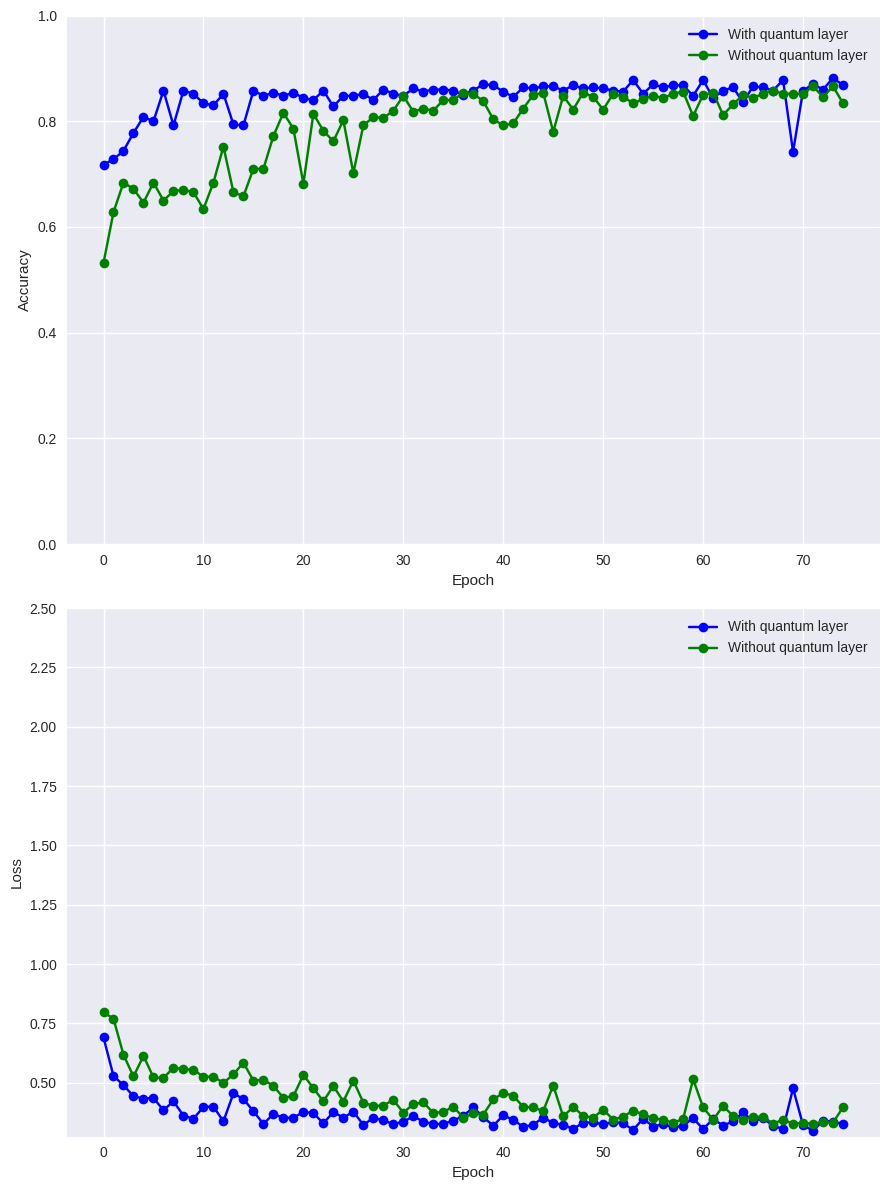

In [ ]:
plot_comparison(q_history_NN6_ang, c_history_NN6)

##Basic_NN5



###Quantum

In [ ]:
q_model_NN5_ang = MyModel5()

n_epochs = 75

q_history_NN5_ang = q_model_NN5_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.1061 - accuracy: 0.4684 - val_loss: 0.6513 - val_accuracy: 0.7280 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7527 - accuracy: 0.6376 - val_loss: 0.5946 - val_accuracy: 0.6440 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6646 - accuracy: 0.6944 - val_loss: 0.4694 - val_accuracy: 0.7440 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6090 - accuracy: 0.7464 - val_loss: 0.3910 - val_accuracy: 0.8480 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 3s - loss: 0.5786 - accuracy: 0.7616 - val_loss: 0.3593 - val_accuracy: 0.8400 - 3s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5435 - accuracy: 0.7652 - val_loss: 0.3541 - val_accuracy: 0.8460 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5192 - accuracy: 0.7888 - val_loss: 0.3519 - val_accuracy: 0.8480 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.4906 - accuracy: 0.8028 - val_loss: 0.3630 - val_accuracy: 0.8540 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_ang = np.argmax(q_model_NN5_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN5, q_precision_ang_NN5, q_recall_ang_NN5, q_accuracy_ang_NN5 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN5_ang)
print("F1 Score:", q_f1_ang_NN5)
print("Precision:", q_precision_ang_NN5)
print("Recall:", q_recall_ang_NN5)
print("Accuracy:", q_accuracy_ang_NN5)

F1 Score: 0.8639916519384255
Precision: 0.8828459549941792
Recall: 0.866
Accuracy: 0.866


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


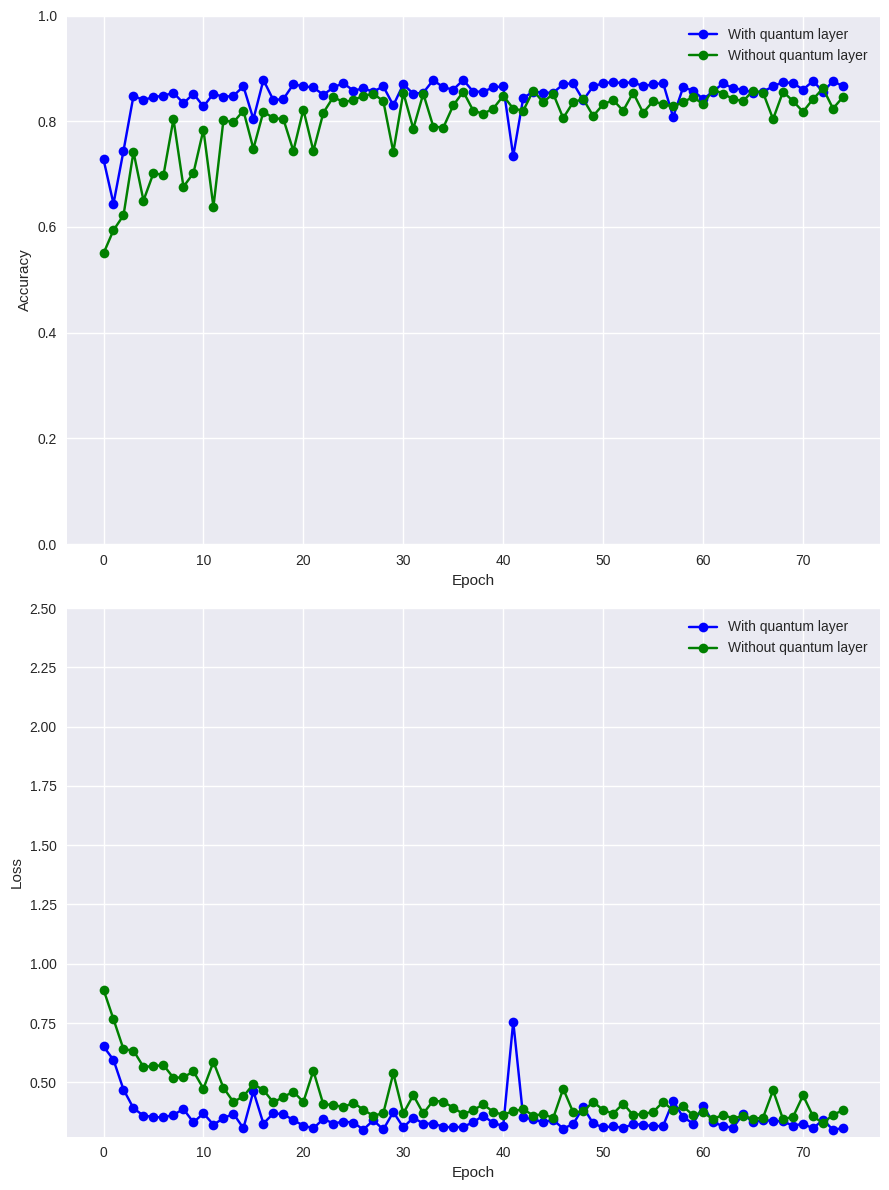

In [ ]:
plot_comparison(q_history_NN5_ang, c_history_NN5)

##Basic_NN4



###Quantum

In [ ]:
q_model_NN4_ang = MyModel4()

n_epochs = 75

q_history_NN4_ang = q_model_NN4_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.0596 - accuracy: 0.5176 - val_loss: 0.6422 - val_accuracy: 0.6320 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 0.7531 - accuracy: 0.6240 - val_loss: 0.4973 - val_accuracy: 0.6740 - 3s/epoch - 5ms/step
Epoch 3/75
625/625 - 3s - loss: 0.6687 - accuracy: 0.6620 - val_loss: 0.5091 - val_accuracy: 0.7180 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6359 - accuracy: 0.6824 - val_loss: 0.5201 - val_accuracy: 0.6580 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6088 - accuracy: 0.6912 - val_loss: 0.4773 - val_accuracy: 0.6680 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5947 - accuracy: 0.7196 - val_loss: 0.4544 - val_accuracy: 0.7500 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5843 - accuracy: 0.7108 - val_loss: 0.3942 - val_accuracy: 0.8420 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5447 - accuracy: 0.7456 - val_loss: 0.3653 - val_accuracy: 0.8500 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_ang = np.argmax(q_model_NN4_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 5ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN4, q_precision_ang_NN4, q_recall_ang_NN4, q_accuracy_ang_NN4 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN4_ang)
print("F1 Score:", q_f1_ang_NN4)
print("Precision:", q_precision_ang_NN4)
print("Recall:", q_recall_ang_NN4)
print("Accuracy:", q_accuracy_ang_NN4)

F1 Score: 0.8647420865781789
Precision: 0.8920419171471804
Recall: 0.868
Accuracy: 0.868


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


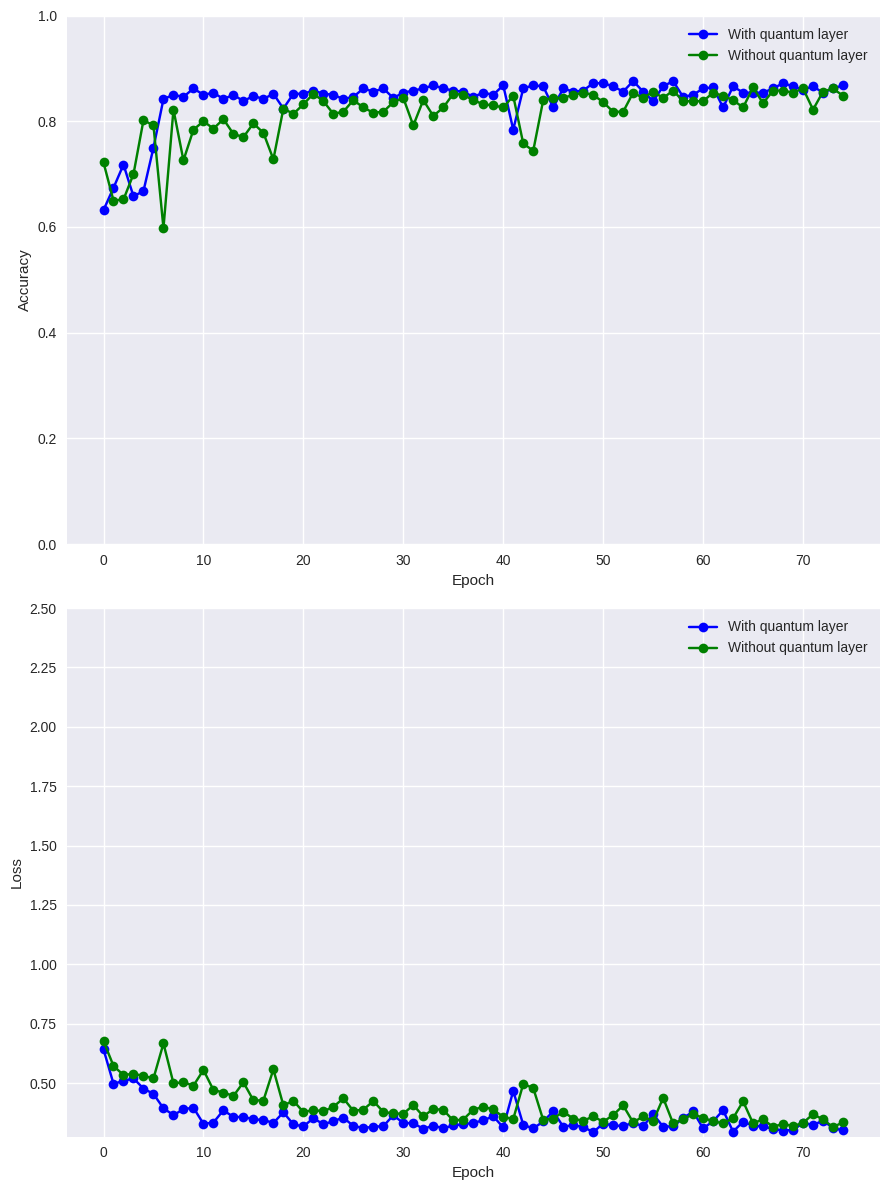

In [ ]:
plot_comparison(q_history_NN4_ang, c_history_NN4)

##Basic_NN3



###Quantum

In [ ]:
q_model_NN3_ang = MyModel3()

n_epochs = 75

q_history_NN3_ang = q_model_NN3_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 7s - loss: 1.0188 - accuracy: 0.5312 - val_loss: 0.5977 - val_accuracy: 0.7220 - 7s/epoch - 11ms/step
Epoch 2/75
625/625 - 3s - loss: 0.7870 - accuracy: 0.6304 - val_loss: 0.5754 - val_accuracy: 0.7120 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7024 - accuracy: 0.6536 - val_loss: 0.5139 - val_accuracy: 0.7720 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.6424 - accuracy: 0.6872 - val_loss: 0.4749 - val_accuracy: 0.7360 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6231 - accuracy: 0.6976 - val_loss: 0.4792 - val_accuracy: 0.7440 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6053 - accuracy: 0.6964 - val_loss: 0.4871 - val_accuracy: 0.7420 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5754 - accuracy: 0.7128 - val_loss: 0.4520 - val_accuracy: 0.7460 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5767 - accuracy: 0.7144 - val_loss: 0.4565 - val_accuracy: 0.7440 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s

In [ ]:
q_y_pred_NN3_ang = np.argmax(q_model_NN3_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN3, q_precision_ang_NN3, q_recall_ang_NN3, q_accuracy_ang_NN3 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN3_ang)
print("F1 Score:", q_f1_ang_NN3)
print("Precision:", q_precision_ang_NN3)
print("Recall:", q_recall_ang_NN3)
print("Accuracy:", q_accuracy_ang_NN3)

F1 Score: 0.8675367912995157
Precision: 0.8861855379050066
Recall: 0.87
Accuracy: 0.87


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


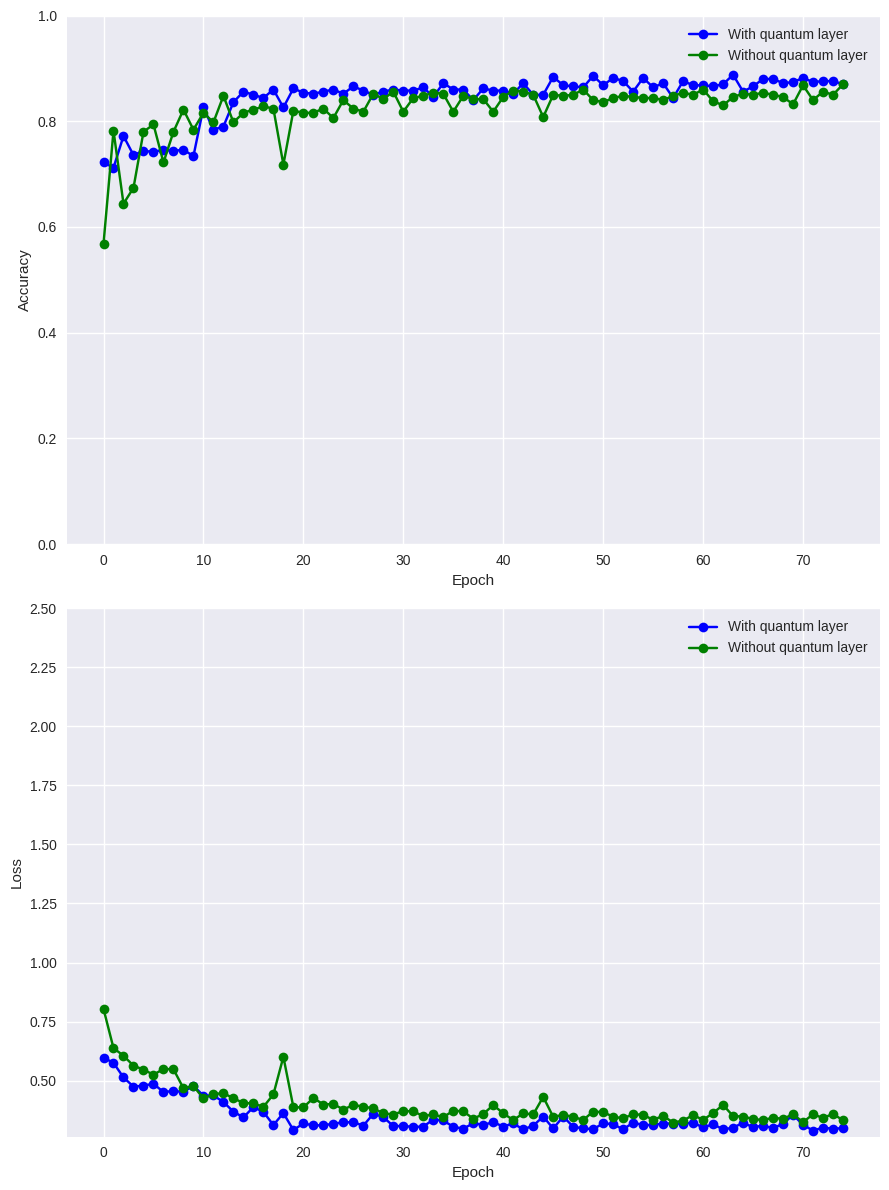

In [ ]:
plot_comparison(q_history_NN3_ang, c_history_NN3)

##Basic_NN2



###Quantum

In [ ]:
q_model_NN2_ang = MyModel2()

n_epochs = 75

q_history_NN2_ang = q_model_NN2_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 0.9444 - accuracy: 0.5704 - val_loss: 0.5525 - val_accuracy: 0.7980 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7181 - accuracy: 0.6780 - val_loss: 0.4082 - val_accuracy: 0.8460 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.6195 - accuracy: 0.7204 - val_loss: 0.3698 - val_accuracy: 0.8440 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5773 - accuracy: 0.7432 - val_loss: 0.3847 - val_accuracy: 0.8260 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.5620 - accuracy: 0.7652 - val_loss: 0.3359 - val_accuracy: 0.8660 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.5666 - accuracy: 0.7516 - val_loss: 0.3884 - val_accuracy: 0.8420 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.5184 - accuracy: 0.7776 - val_loss: 0.3672 - val_accuracy: 0.8380 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5211 - accuracy: 0.7804 - val_loss: 0.3337 - val_accuracy: 0.8680 - 2s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_ang = np.argmax(q_model_NN2_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN2, q_precision_ang_NN2, q_recall_ang_NN2, q_accuracy_ang_NN2 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN2_ang)
print("F1 Score:", q_f1_ang_NN2)
print("Precision:", q_precision_ang_NN2)
print("Recall:", q_recall_ang_NN2)
print("Accuracy:", q_accuracy_ang_NN2)

F1 Score: 0.8578231142661137
Precision: 0.8813107344790205
Recall: 0.86
Accuracy: 0.86


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


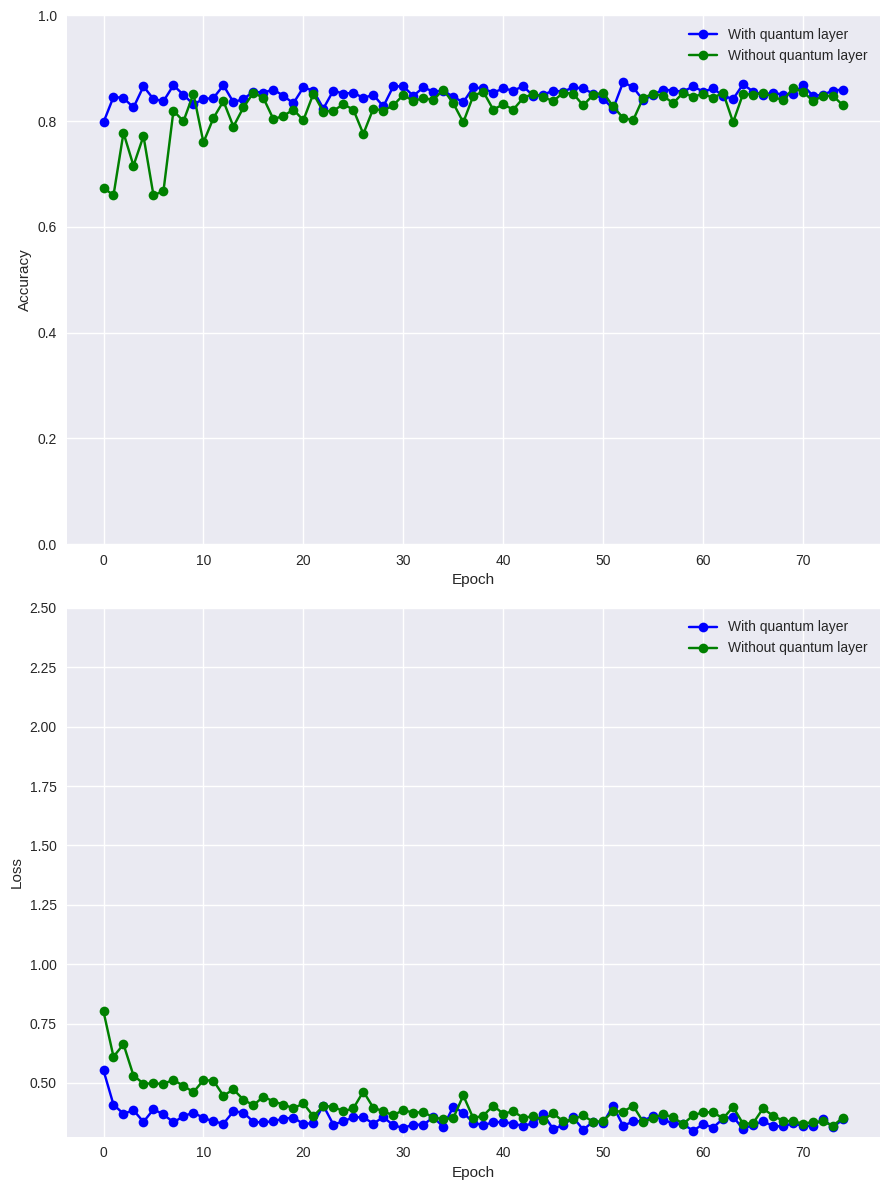

In [ ]:
plot_comparison(q_history_NN2_ang, c_history_NN2)

##Basic_NN1



###Quantum

In [ ]:
q_model_NN1_ang = MyModel1()

n_epochs = 75

q_history_NN1_ang = q_model_NN1_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.8639 - accuracy: 0.5852 - val_loss: 0.4991 - val_accuracy: 0.8040 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 0.6969 - accuracy: 0.6624 - val_loss: 0.5411 - val_accuracy: 0.6460 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.6906 - accuracy: 0.6628 - val_loss: 0.4949 - val_accuracy: 0.7180 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.6494 - accuracy: 0.6888 - val_loss: 0.5648 - val_accuracy: 0.6600 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.6335 - accuracy: 0.6992 - val_loss: 0.4631 - val_accuracy: 0.8220 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.6122 - accuracy: 0.7168 - val_loss: 0.4551 - val_accuracy: 0.8180 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 1s - loss: 0.5887 - accuracy: 0.7260 - val_loss: 0.4494 - val_accuracy: 0.8320 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 2s - loss: 0.5899 - accuracy: 0.7104 - val_loss: 0.4675 - val_accuracy: 0.7960 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_ang = np.argmax(q_model_NN1_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN1, q_precision_ang_NN1, q_recall_ang_NN1, q_accuracy_ang_NN1 = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN1_ang)
print("F1 Score:", q_f1_ang_NN1)
print("Precision:", q_precision_ang_NN1)
print("Recall:", q_recall_ang_NN1)
print("Accuracy:", q_accuracy_ang_NN1)

F1 Score: 0.8719123152472181
Precision: 0.880530965298332
Recall: 0.872
Accuracy: 0.872


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


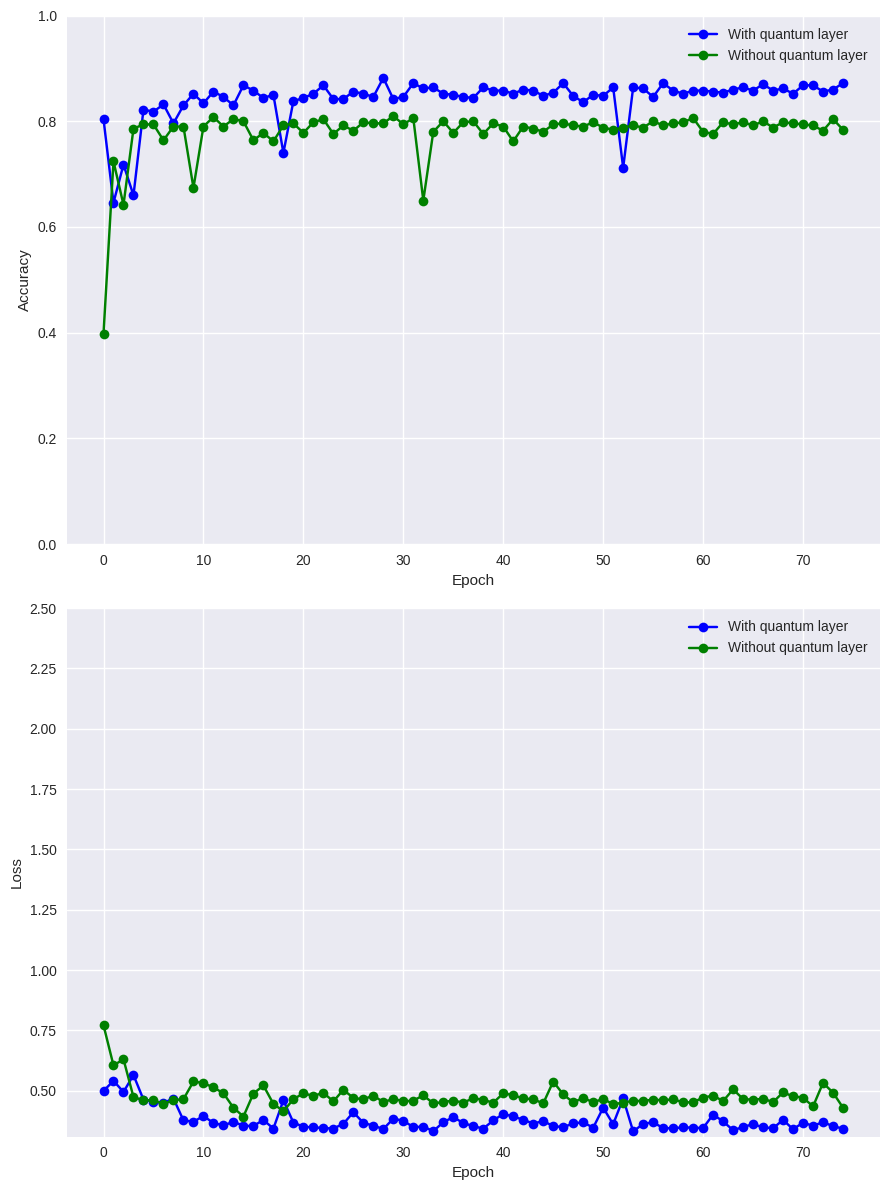

In [ ]:
plot_comparison(q_history_NN1_ang, c_history_NN1)

##Basic_NN



###Quantum

In [ ]:
q_model_NN_ang = MyModel()

n_epochs = 75

q_history_NN_ang = q_model_NN_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.7797 - accuracy: 0.6400 - val_loss: 0.6200 - val_accuracy: 0.7040 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 0.7193 - accuracy: 0.6836 - val_loss: 0.6541 - val_accuracy: 0.7100 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.6807 - accuracy: 0.6896 - val_loss: 0.7152 - val_accuracy: 0.6880 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.6615 - accuracy: 0.7192 - val_loss: 0.5745 - val_accuracy: 0.6980 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.6749 - accuracy: 0.7116 - val_loss: 0.5908 - val_accuracy: 0.7280 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.6291 - accuracy: 0.7236 - val_loss: 0.5509 - val_accuracy: 0.8020 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.6289 - accuracy: 0.7376 - val_loss: 0.5295 - val_accuracy: 0.8120 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 1s - loss: 0.6181 - accuracy: 0.7432 - val_loss: 0.6097 - val_accuracy: 0.7060 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_ang = np.argmax(q_model_NN_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_ang_NN, q_precision_ang_NN, q_recall_ang_NN, q_accuracy_ang_NN = calculate_classification_metrics(q_test_label_angle, q_y_pred_NN_ang)
print("F1 Score:", q_f1_ang_NN)
print("Precision:", q_precision_ang_NN)
print("Recall:", q_recall_ang_NN)
print("Accuracy:", q_accuracy_ang_NN)

F1 Score: 0.7370907196249705
Precision: 0.7772780622977795
Recall: 0.738
Accuracy: 0.738


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


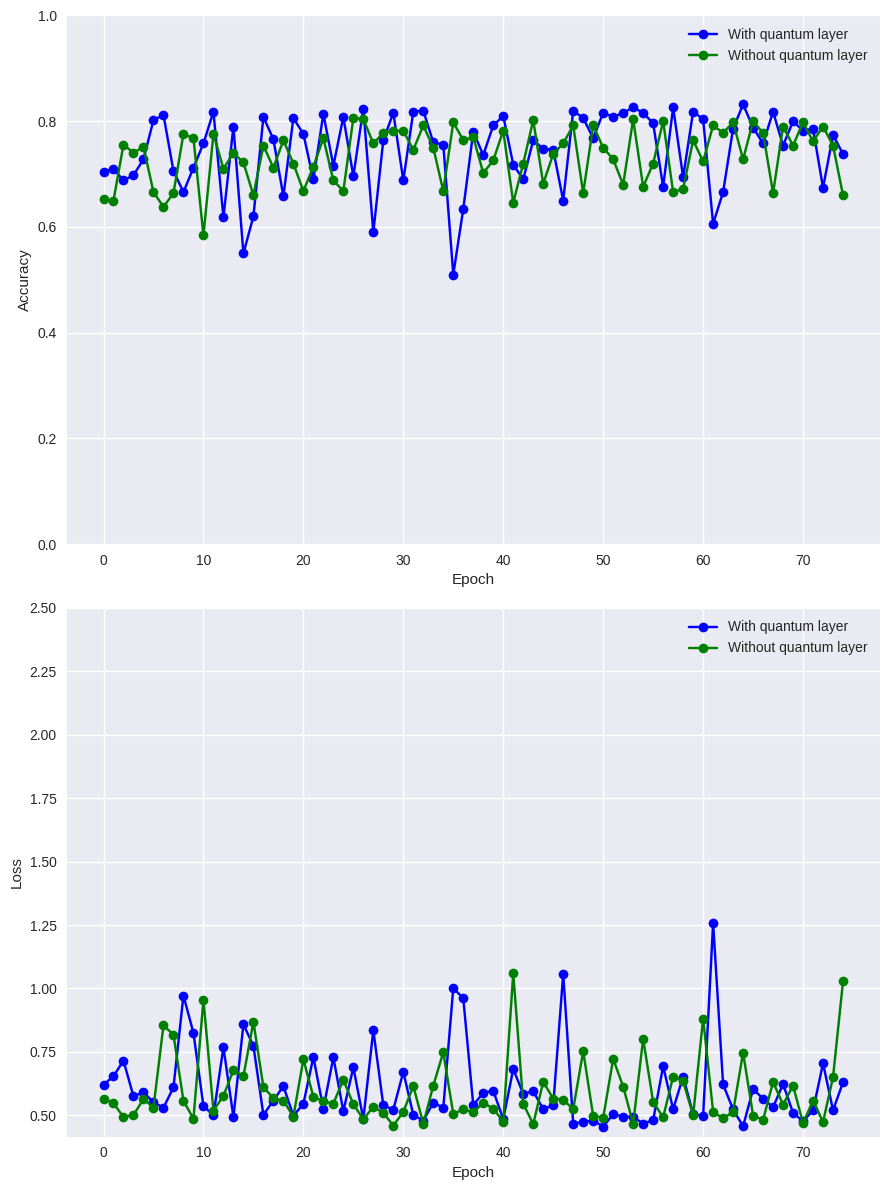

In [ ]:
plot_comparison(q_history_NN_ang, c_history_NN)

##CNN

###Quantum

In [ ]:
q_CNN_model_ang = MyCNNModel()

n_epochs = 75

q_history_CNN_ang = q_CNN_model_ang.fit(
    q_train_color_images_angle,
    q_train_label_angle,
    validation_data=(q_test_color_images_angle, q_test_label_angle),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 0.9072 - accuracy: 0.5136 - val_loss: 0.7232 - val_accuracy: 0.6020 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7259 - accuracy: 0.5860 - val_loss: 0.5811 - val_accuracy: 0.6360 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.5392 - accuracy: 0.7244 - val_loss: 0.5080 - val_accuracy: 0.7380 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.5172 - accuracy: 0.7248 - val_loss: 0.4638 - val_accuracy: 0.7700 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.4918 - accuracy: 0.7452 - val_loss: 0.5033 - val_accuracy: 0.7860 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 3s - loss: 0.4609 - accuracy: 0.7848 - val_loss: 0.4108 - val_accuracy: 0.8140 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.4519 - accuracy: 0.7904 - val_loss: 0.4580 - val_accuracy: 0.7460 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.4578 - accuracy: 0.7804 - val_loss: 0.3956 - val_accuracy: 0.8440 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_ang = np.argmax(q_CNN_model_ang.predict(q_test_color_images_angle), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_ang, q_precision_CNN_ang, q_recall_CNN_ang, q_accuracy_CNN_ang = calculate_classification_metrics(q_test_label_angle, q_y_pred_CNN_ang)
print("F1 Score:", q_f1_CNN_ang)
print("Precision:", q_precision_CNN_ang)
print("Recall:", q_recall_CNN_ang)
print("Accuracy:", q_accuracy_CNN_ang)

F1 Score: 0.9134759383428691
Precision: 0.9165311775090882
Recall: 0.914
Accuracy: 0.914


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


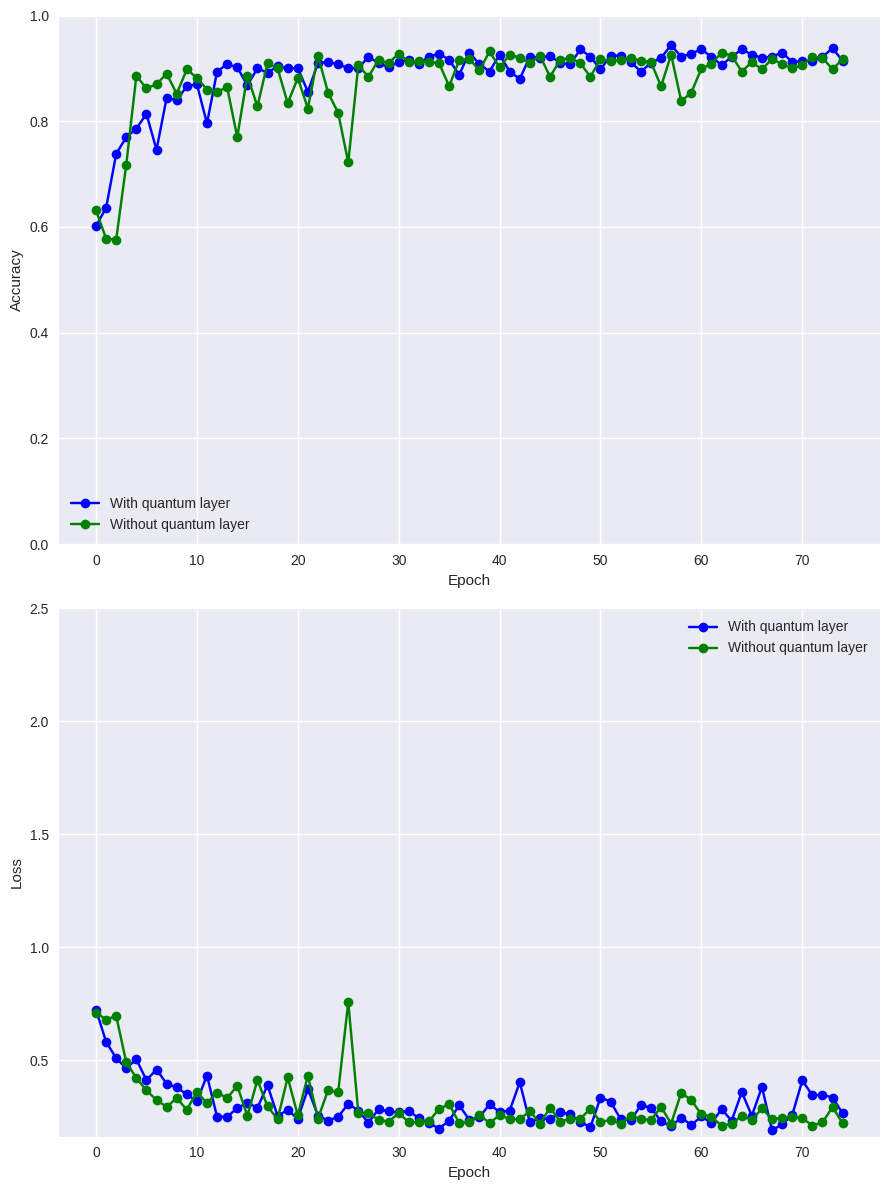

In [ ]:
plot_comparison(q_history_CNN_ang, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_angle_flattened = q_train_color_images_angle.reshape(q_train_color_images_angle.shape[0], -1)
q_test_color_images_angle_flattened = q_test_color_images_angle.reshape(q_test_color_images_angle.shape[0], -1)

In [ ]:
q_svm_model_ang = MySVMModel()

n_epochs = 75

q_svm_history_ang = q_svm_model_ang.fit(
    q_train_color_images_angle_flattened,
    q_train_label_angle
)

In [ ]:
q_y_predSVM_ang = q_svm_model_ang.predict(q_test_color_images_angle_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_ang, q_precision_SVM_ang, q_recall_SVM_ang, q_accuracy_SVM_ang = calculate_classification_metrics(q_test_label_angle, q_y_predSVM_ang)
print("F1 Score:", q_f1_SVM_ang)
print("Precision:", q_precision_SVM_ang)
print("Recall:", q_recall_SVM_ang)
print("Accuracy:", q_accuracy_SVM_ang)

F1 Score: 0.7310162165975446
Precision: 0.7565986257148523
Recall: 0.736
Accuracy: 0.736


#Amplitude_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_amp = np.load(SAVE_PATH_1 + "q_train_color_images_amplitude.npy")
q_test_color_images_amp = np.load(SAVE_PATH_1 + "q_test_color_images_amplitude.npy")
q_train_label_amp = np.load(SAVE_PATH_1 + "q_train_label_amplitude.npy")
q_test_label_amp = np.load(SAVE_PATH_1 + "q_test_label_amplitude.npy")

In [ ]:
q_model_NN6_amp = MyModel6()

n_epochs = 75

q_history_NN6_amp = q_model_NN6_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.1678 - accuracy: 0.4196 - val_loss: 0.8092 - val_accuracy: 0.6380 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9077 - accuracy: 0.5052 - val_loss: 0.7794 - val_accuracy: 0.4640 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8633 - accuracy: 0.4960 - val_loss: 0.7341 - val_accuracy: 0.6100 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8556 - accuracy: 0.5148 - val_loss: 0.7490 - val_accuracy: 0.5040 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8373 - accuracy: 0.5000 - val_loss: 0.7791 - val_accuracy: 0.3900 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 3s - loss: 0.8102 - accuracy: 0.4952 - val_loss: 0.7436 - val_accuracy: 0.6160 - 3s/epoch - 5ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8056 - accuracy: 0.5204 - val_loss: 0.7799 - val_accuracy: 0.4340 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8000 - accuracy: 0.5164 - val_loss: 0.7127 - val_accuracy: 0.6040 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN6_amp = np.argmax(q_model_NN6_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN6, q_precision_amp_NN6, q_recall_amp_NN6, q_accuracy_amp_NN6 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN6_amp)
print("F1 Score:", q_f1_amp_NN6)
print("Precision:", q_precision_amp_NN6)
print("Recall:", q_recall_amp_NN6)
print("Accuracy:", q_accuracy_amp_NN6)

F1 Score: 0.58091681968574
Precision: 0.6811041500399042
Recall: 0.636
Accuracy: 0.636


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


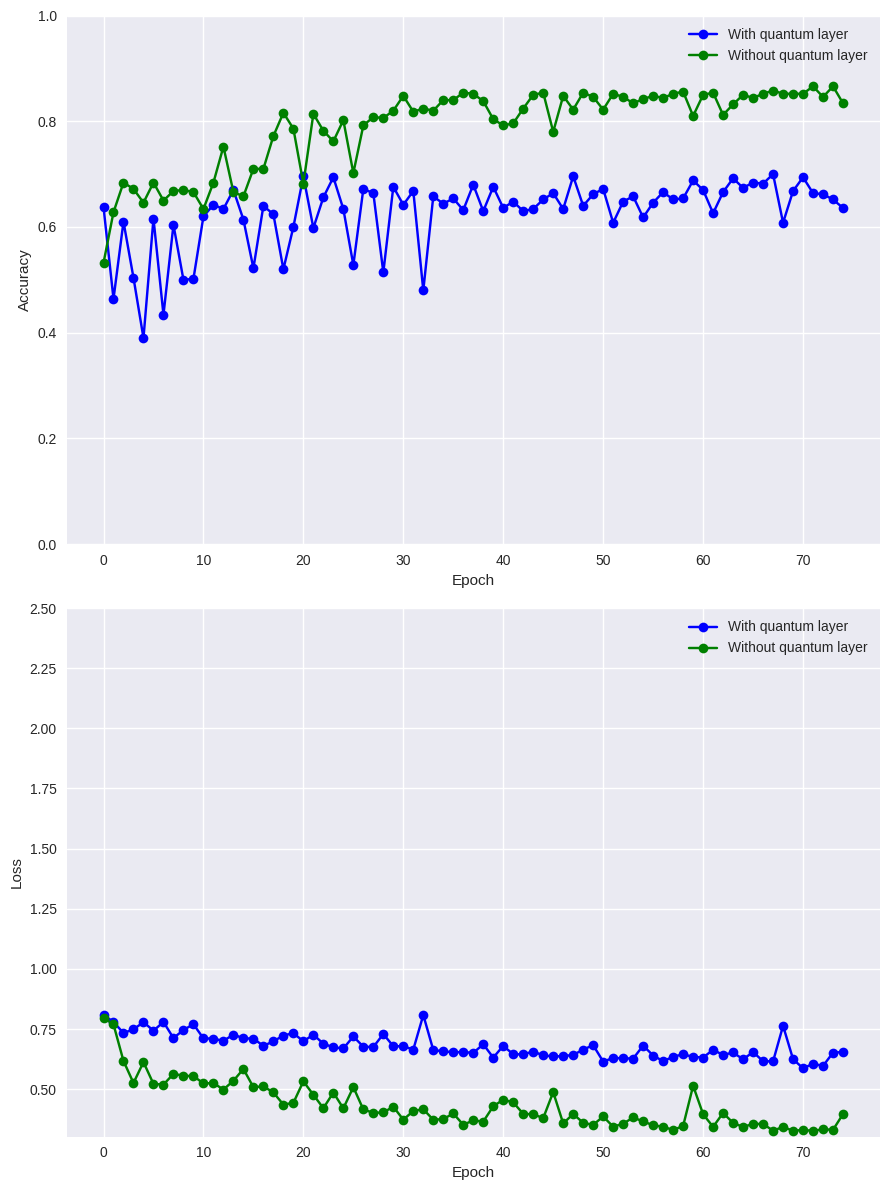

In [ ]:
plot_comparison(q_history_NN6_amp, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_amp = MyModel5()

n_epochs = 75

q_history_NN5_amp = q_model_NN5_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.2442 - accuracy: 0.3860 - val_loss: 0.8327 - val_accuracy: 0.6220 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 3s - loss: 0.9486 - accuracy: 0.4688 - val_loss: 0.7667 - val_accuracy: 0.6260 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8899 - accuracy: 0.5064 - val_loss: 0.7219 - val_accuracy: 0.6160 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8625 - accuracy: 0.5064 - val_loss: 0.7410 - val_accuracy: 0.6340 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8390 - accuracy: 0.5020 - val_loss: 0.7560 - val_accuracy: 0.5700 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8102 - accuracy: 0.5140 - val_loss: 0.7253 - val_accuracy: 0.6220 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 3s - loss: 0.7948 - accuracy: 0.5208 - val_loss: 0.7205 - val_accuracy: 0.6160 - 3s/epoch - 5ms/step
Epoch 8/75
625/625 - 2s - loss: 0.7965 - accuracy: 0.5236 - val_loss: 0.7409 - val_accuracy: 0.5860 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_amp = np.argmax(q_model_NN5_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN5, q_precision_amp_NN5, q_recall_amp_NN5, q_accuracy_amp_NN5 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN5_amp)
print("F1 Score:", q_f1_amp_NN5)
print("Precision:", q_precision_amp_NN5)
print("Recall:", q_recall_amp_NN5)
print("Accuracy:", q_accuracy_amp_NN5)

F1 Score: 0.6343660371051312
Precision: 0.7173716900948023
Recall: 0.668
Accuracy: 0.668


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


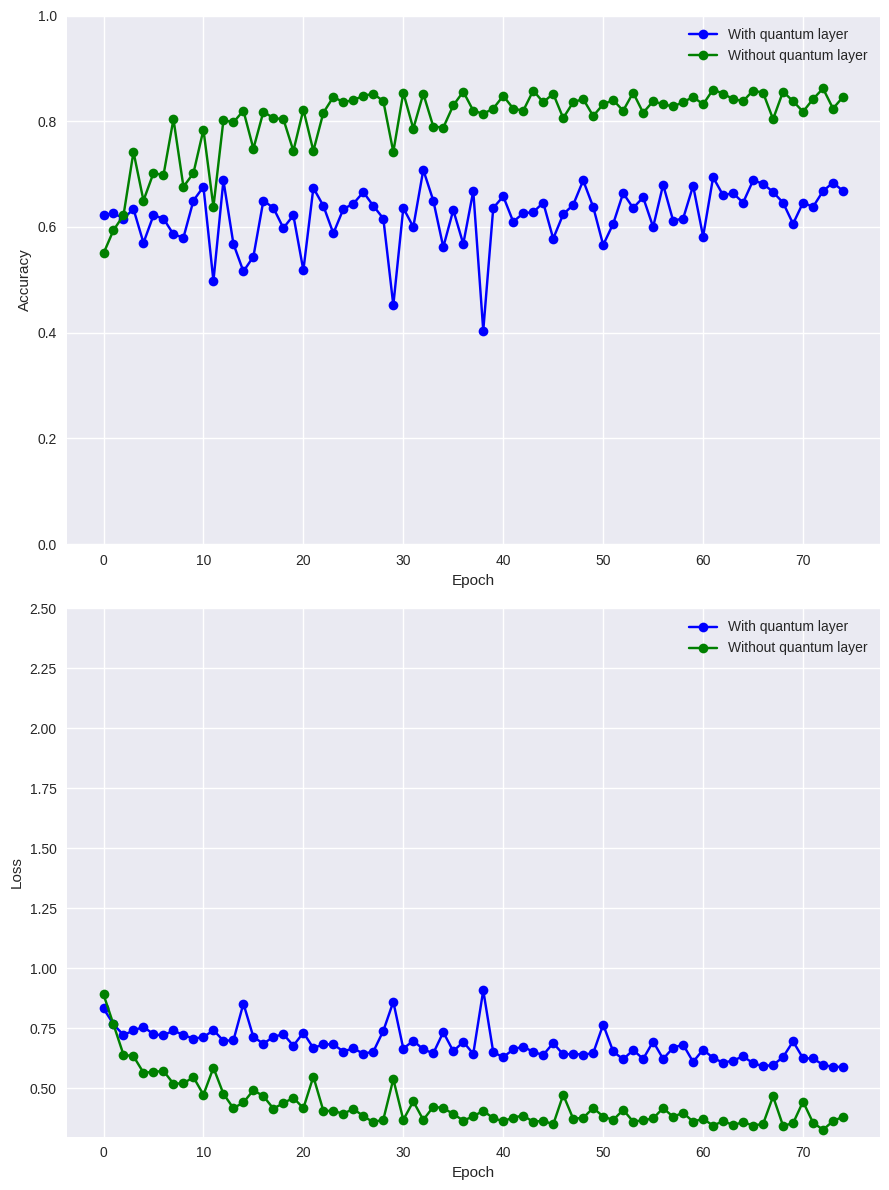

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_amp = MyModel4()

n_epochs = 75

q_history_NN4_amp = q_model_NN4_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.1609 - accuracy: 0.3740 - val_loss: 0.8019 - val_accuracy: 0.6360 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9459 - accuracy: 0.4372 - val_loss: 0.7724 - val_accuracy: 0.5040 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8969 - accuracy: 0.4780 - val_loss: 0.7482 - val_accuracy: 0.6180 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8433 - accuracy: 0.4964 - val_loss: 0.7332 - val_accuracy: 0.6280 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8353 - accuracy: 0.4956 - val_loss: 0.7382 - val_accuracy: 0.6140 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8315 - accuracy: 0.4916 - val_loss: 0.7165 - val_accuracy: 0.6300 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8200 - accuracy: 0.5016 - val_loss: 0.7339 - val_accuracy: 0.6240 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8156 - accuracy: 0.5152 - val_loss: 0.7247 - val_accuracy: 0.6260 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_amp = np.argmax(q_model_NN4_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN4, q_precision_amp_NN4, q_recall_amp_NN4, q_accuracy_amp_NN4 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN4_amp)
print("F1 Score:", q_f1_amp_NN4)
print("Precision:", q_precision_amp_NN4)
print("Recall:", q_recall_amp_NN4)
print("Accuracy:", q_accuracy_amp_NN4)

F1 Score: 0.6427222083162125
Precision: 0.764678548650486
Recall: 0.672
Accuracy: 0.672


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


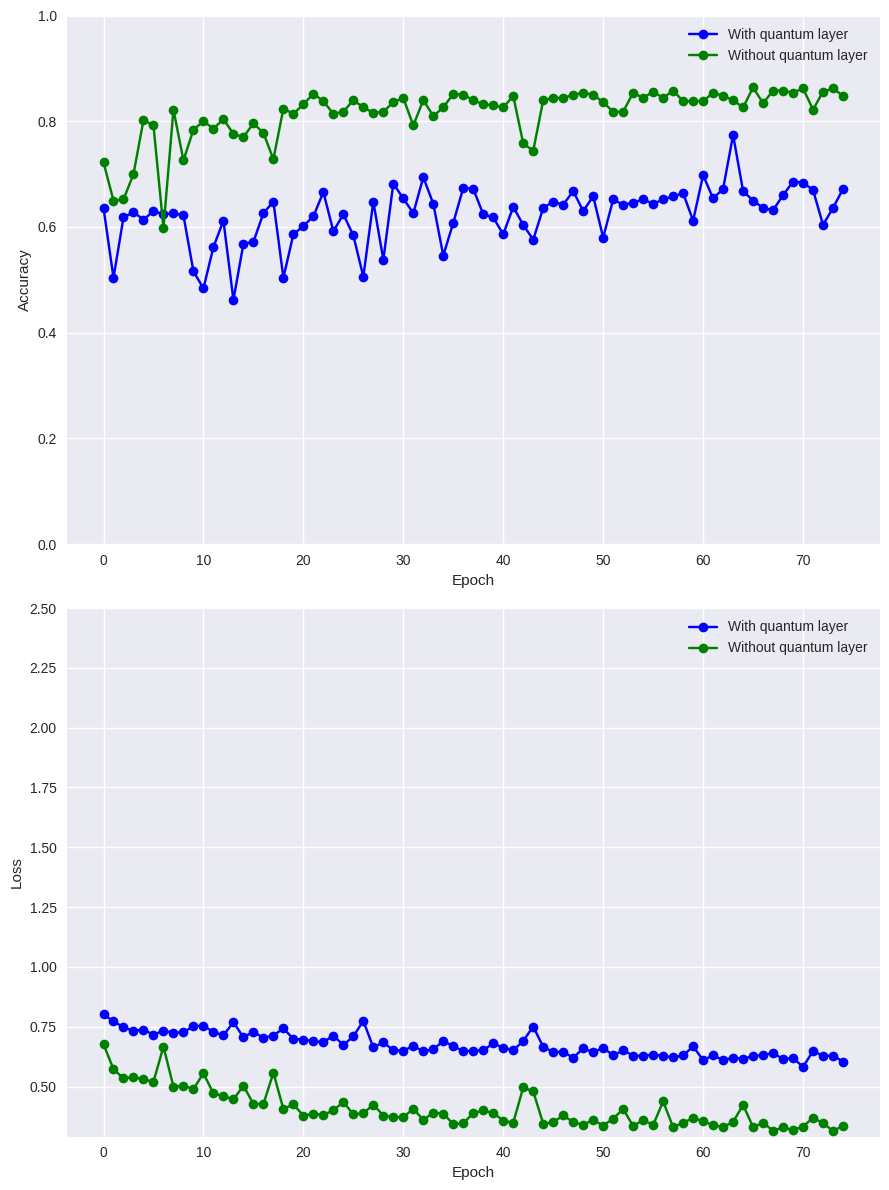

In [ ]:
plot_comparison(q_history_NN4_amp, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_amp = MyModel3()

n_epochs = 75

q_history_NN3_amp = q_model_NN3_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.0585 - accuracy: 0.4364 - val_loss: 0.7787 - val_accuracy: 0.6480 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 0.8981 - accuracy: 0.4848 - val_loss: 0.7644 - val_accuracy: 0.5220 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.8463 - accuracy: 0.5000 - val_loss: 0.7752 - val_accuracy: 0.5780 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8399 - accuracy: 0.5024 - val_loss: 0.7720 - val_accuracy: 0.4840 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8201 - accuracy: 0.5056 - val_loss: 0.8458 - val_accuracy: 0.5880 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8172 - accuracy: 0.5116 - val_loss: 0.7410 - val_accuracy: 0.5640 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8004 - accuracy: 0.5132 - val_loss: 0.7302 - val_accuracy: 0.5580 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8010 - accuracy: 0.5124 - val_loss: 0.7468 - val_accuracy: 0.6140 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_amp = np.argmax(q_model_NN3_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN3, q_precision_amp_NN3, q_recall_amp_NN3, q_accuracy_amp_NN3 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN3_amp)
print("F1 Score:", q_f1_amp_NN3)
print("Precision:", q_precision_amp_NN3)
print("Recall:", q_recall_amp_NN3)
print("Accuracy:", q_accuracy_amp_NN3)

F1 Score: 0.7107082851221829
Precision: 0.8113309336267082
Recall: 0.748
Accuracy: 0.748


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


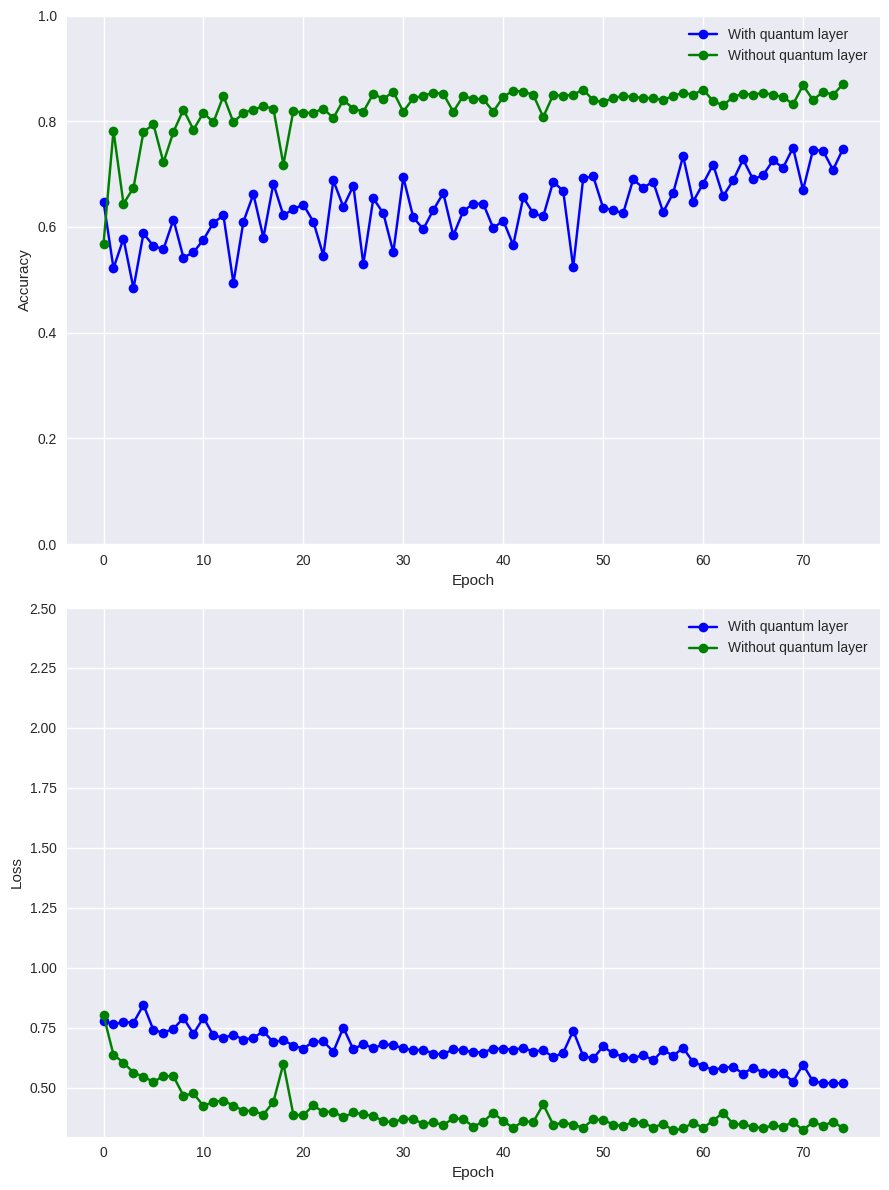

In [ ]:
plot_comparison(q_history_NN3_amp, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_amp = MyModel2()

n_epochs = 75

q_history_NN2_amp = q_model_NN2_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.2837 - accuracy: 0.3776 - val_loss: 1.0372 - val_accuracy: 0.5540 - 3s/epoch - 5ms/step
Epoch 2/75
625/625 - 2s - loss: 1.0228 - accuracy: 0.4736 - val_loss: 0.9244 - val_accuracy: 0.4800 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9117 - accuracy: 0.4748 - val_loss: 0.7478 - val_accuracy: 0.6040 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8813 - accuracy: 0.5072 - val_loss: 0.7517 - val_accuracy: 0.6200 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8340 - accuracy: 0.5396 - val_loss: 0.7152 - val_accuracy: 0.6340 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8322 - accuracy: 0.5232 - val_loss: 0.7225 - val_accuracy: 0.6360 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8026 - accuracy: 0.5388 - val_loss: 0.6979 - val_accuracy: 0.6540 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8048 - accuracy: 0.5468 - val_loss: 0.6825 - val_accuracy: 0.6040 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_amp = np.argmax(q_model_NN2_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN2, q_precision_amp_NN2, q_recall_amp_NN2, q_accuracy_amp_NN2 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN2_amp)
print("F1 Score:", q_f1_amp_NN2)
print("Precision:", q_precision_amp_NN2)
print("Recall:", q_recall_amp_NN2)
print("Accuracy:", q_accuracy_amp_NN2)

F1 Score: 0.5341955804332656
Precision: 0.6594032959726444
Recall: 0.564
Accuracy: 0.564


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


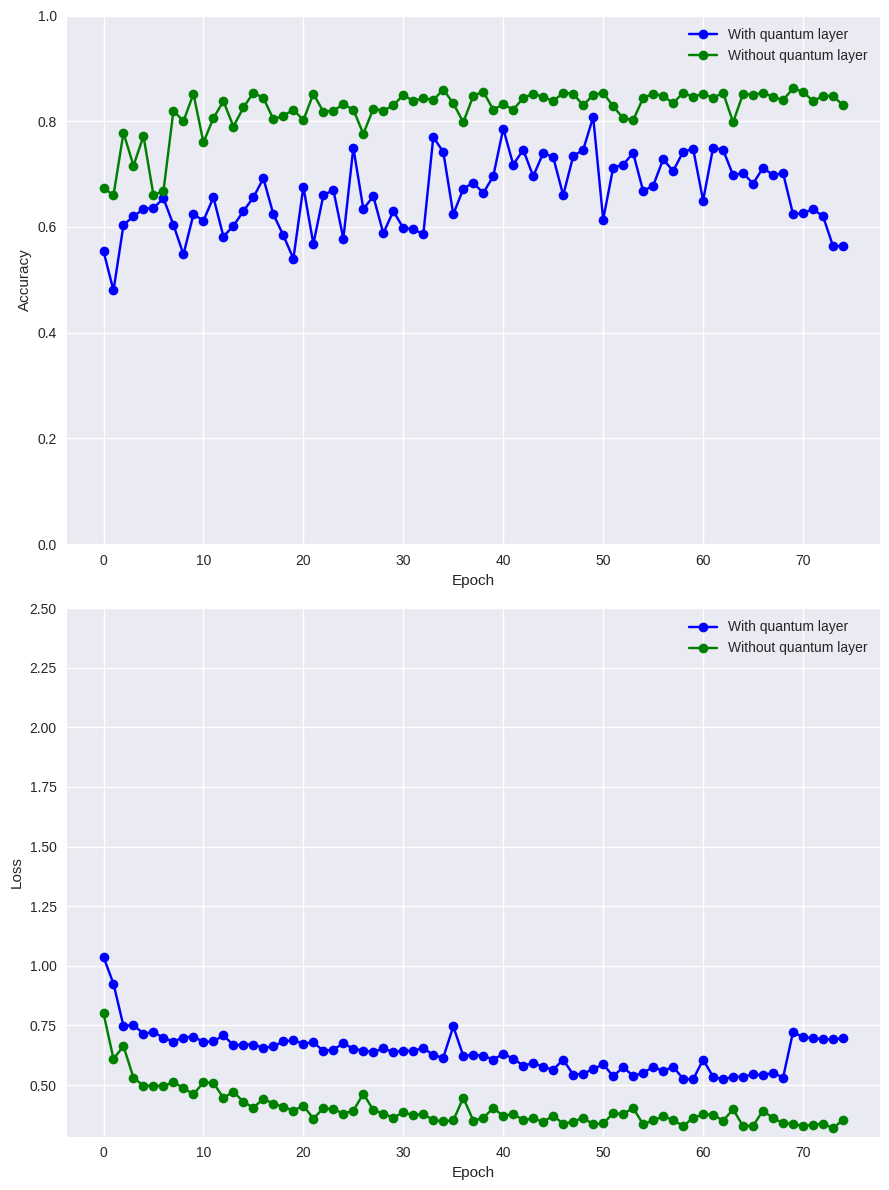

In [ ]:
plot_comparison(q_history_NN2_amp, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_amp = MyModel1()

n_epochs = 75

q_history_NN1_amp = q_model_NN1_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.1855 - accuracy: 0.4052 - val_loss: 1.0491 - val_accuracy: 0.4080 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 1.0123 - accuracy: 0.4876 - val_loss: 0.9359 - val_accuracy: 0.5920 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9273 - accuracy: 0.5248 - val_loss: 0.9123 - val_accuracy: 0.4760 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8865 - accuracy: 0.5420 - val_loss: 0.8395 - val_accuracy: 0.5080 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8576 - accuracy: 0.5412 - val_loss: 0.8140 - val_accuracy: 0.5360 - 2s/epoch - 2ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8422 - accuracy: 0.5496 - val_loss: 0.7804 - val_accuracy: 0.6660 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8435 - accuracy: 0.5376 - val_loss: 0.7656 - val_accuracy: 0.5460 - 2s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.7954 - accuracy: 0.5640 - val_loss: 0.7483 - val_accuracy: 0.6000 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN1_amp = np.argmax(q_model_NN1_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN1, q_precision_amp_NN1, q_recall_amp_NN1, q_accuracy_amp_NN1 = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN1_amp)
print("F1 Score:", q_f1_amp_NN1)
print("Precision:", q_precision_amp_NN1)
print("Recall:", q_recall_amp_NN1)
print("Accuracy:", q_accuracy_amp_NN1)

F1 Score: 0.6364932874382573
Precision: 0.7336420835776327
Recall: 0.692
Accuracy: 0.692


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


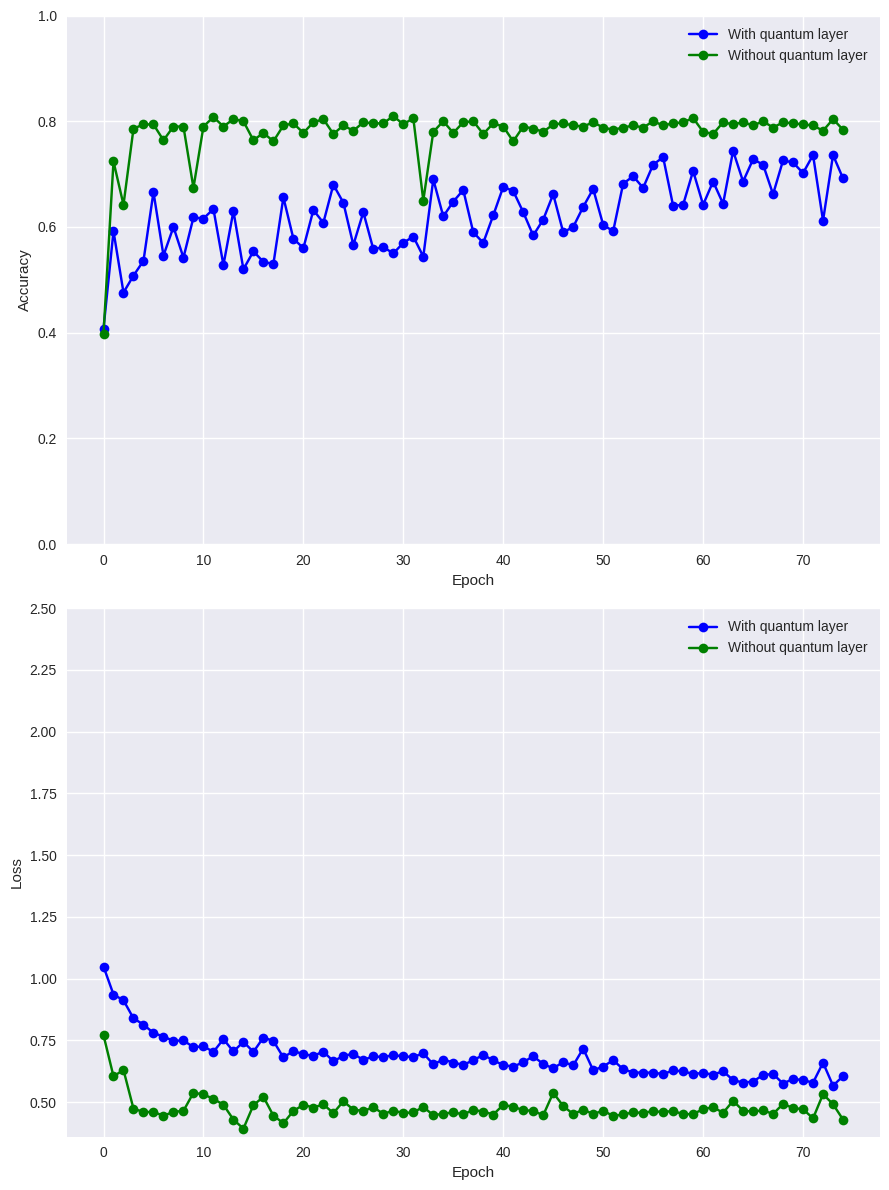

In [ ]:
plot_comparison(q_history_NN1_amp, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_amp = MyModel()

n_epochs = 75

q_history_NN_amp = q_model_NN_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 0.9827 - accuracy: 0.5048 - val_loss: 0.7569 - val_accuracy: 0.5680 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 2s - loss: 0.9499 - accuracy: 0.5264 - val_loss: 0.7871 - val_accuracy: 0.5640 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 1s - loss: 0.8750 - accuracy: 0.5588 - val_loss: 1.0685 - val_accuracy: 0.6100 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 0.9090 - accuracy: 0.5688 - val_loss: 0.7379 - val_accuracy: 0.6260 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 1s - loss: 0.8714 - accuracy: 0.5908 - val_loss: 0.9002 - val_accuracy: 0.6320 - 1s/epoch - 2ms/step
Epoch 6/75
625/625 - 1s - loss: 0.8482 - accuracy: 0.5900 - val_loss: 1.8582 - val_accuracy: 0.4320 - 1s/epoch - 2ms/step
Epoch 7/75
625/625 - 1s - loss: 0.8046 - accuracy: 0.6272 - val_loss: 0.9427 - val_accuracy: 0.5080 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.7986 - accuracy: 0.6308 - val_loss: 0.9424 - val_accuracy: 0.6580 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_amp = np.argmax(q_model_NN_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_amp_NN, q_precision_amp_NN, q_recall_amp_NN, q_accuracy_amp_NN = calculate_classification_metrics(q_test_label_amp, q_y_pred_NN_amp)
print("F1 Score:", q_f1_amp_NN)
print("Precision:", q_precision_amp_NN)
print("Recall:", q_recall_amp_NN)
print("Accuracy:", q_accuracy_amp_NN)

F1 Score: 0.4432423678036241
Precision: 0.5210650962412596
Recall: 0.474
Accuracy: 0.474


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


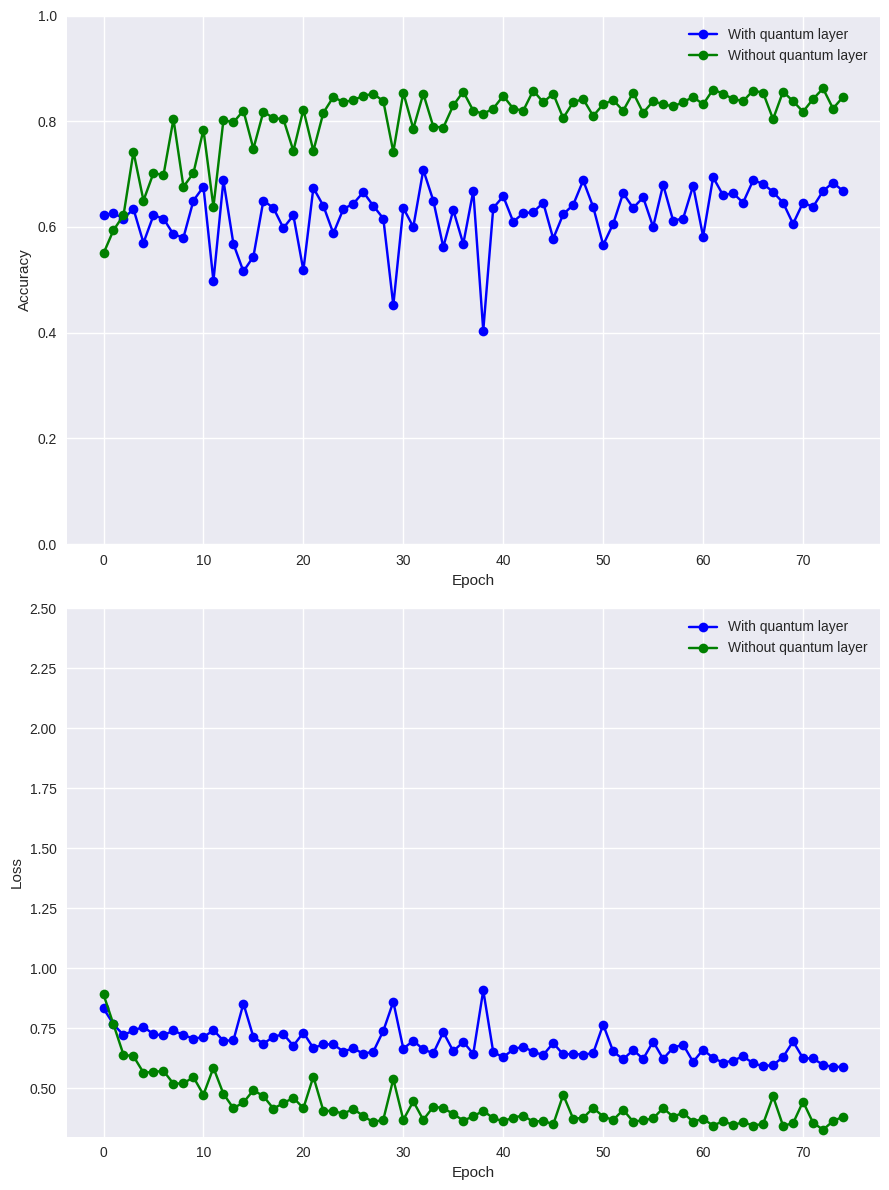

In [ ]:
plot_comparison(q_history_NN5_amp, c_history_NN5)

##CNN

###Quantum

In [ ]:
q_CNN_model_amp = MyCNNModel()

n_epochs = 75

q_history_CNN_amp = q_CNN_model_amp.fit(
    q_train_color_images_amp,
    q_train_label_amp,
    validation_data=(q_test_color_images_amp, q_test_label_amp),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.0886 - accuracy: 0.4116 - val_loss: 0.7205 - val_accuracy: 0.6260 - 4s/epoch - 7ms/step
Epoch 2/75
625/625 - 2s - loss: 0.7929 - accuracy: 0.5076 - val_loss: 0.7182 - val_accuracy: 0.5720 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7627 - accuracy: 0.5568 - val_loss: 0.7720 - val_accuracy: 0.4880 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7484 - accuracy: 0.5500 - val_loss: 0.7248 - val_accuracy: 0.5600 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7385 - accuracy: 0.5476 - val_loss: 0.7204 - val_accuracy: 0.5740 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 3s - loss: 0.7235 - accuracy: 0.5696 - val_loss: 0.6876 - val_accuracy: 0.5840 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.7077 - accuracy: 0.5956 - val_loss: 0.6746 - val_accuracy: 0.5900 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 0.7031 - accuracy: 0.6136 - val_loss: 0.6626 - val_accuracy: 0.6280 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_amp = np.argmax(q_CNN_model_amp.predict(q_test_color_images_amp), axis=1)

16/16 [==============================] - 0s 3ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_amp, q_precision_CNN_amp, q_recall_CNN_amp, q_accuracy_CNN_amp = calculate_classification_metrics(q_test_label_amp, q_y_pred_CNN_amp)
print("F1 Score:", q_f1_CNN_amp)
print("Precision:", q_precision_CNN_amp)
print("Recall:", q_recall_CNN_amp)
print("Accuracy:", q_accuracy_CNN_amp)

F1 Score: 0.8275129184736291
Precision: 0.8541573510221836
Recall: 0.828
Accuracy: 0.828


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


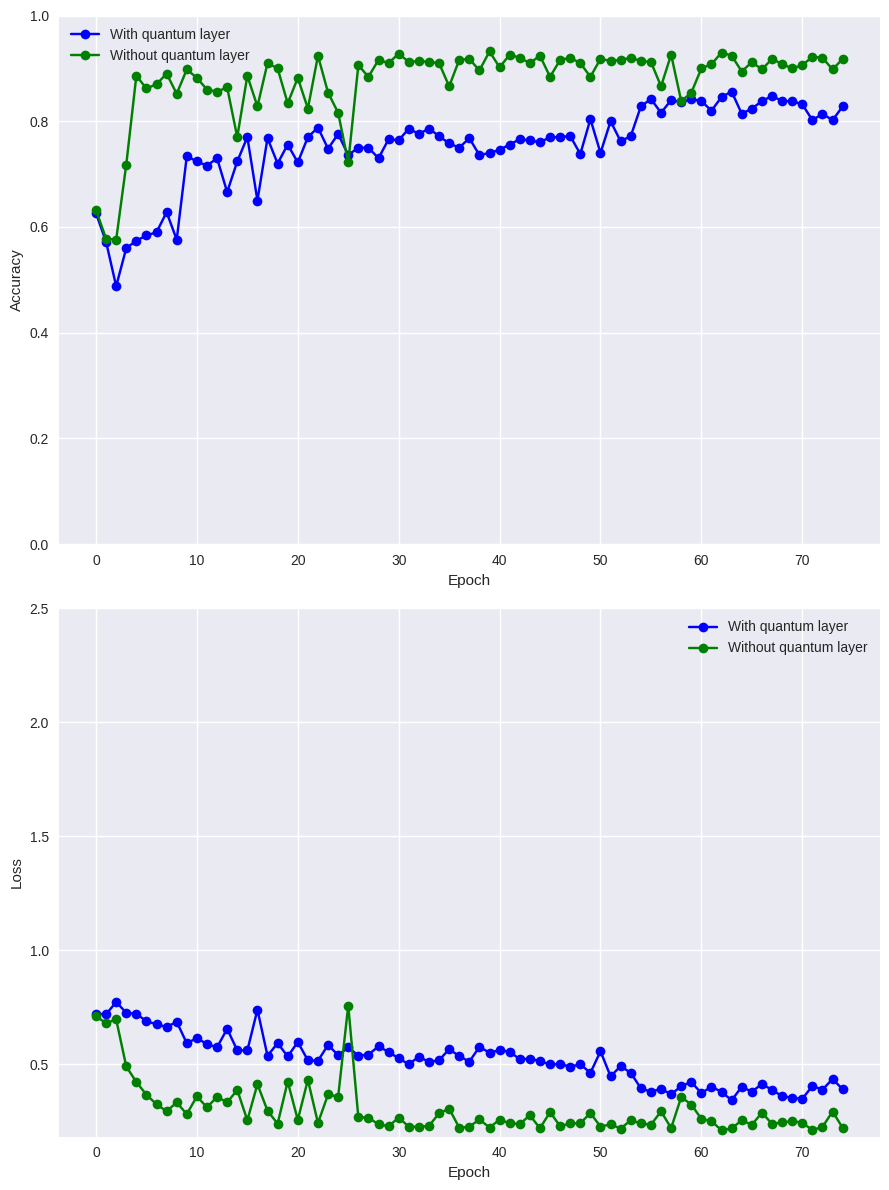

In [ ]:
plot_comparison(q_history_CNN_amp, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_amp_flattened = q_train_color_images_amp.reshape(q_train_color_images_amp.shape[0], -1)
q_test_color_images_amp_flattened = q_test_color_images_amp.reshape(q_test_color_images_amp.shape[0], -1)

In [ ]:
q_svm_model_amp = MySVMModel()

n_epochs = 75

q_svm_history_amp = q_svm_model_amp.fit(
    q_train_color_images_amp_flattened,
    q_train_label_amp
)

In [ ]:
q_y_predSVM_amp = q_svm_model_amp.predict(q_test_color_images_amp_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_amp, q_precision_SVM_amp, q_recall_SVM_amp, q_accuracy_SVM_amp = calculate_classification_metrics(q_test_label_amp, q_y_predSVM_amp)
print("F1 Score:", q_f1_SVM_amp)
print("Precision:", q_precision_SVM_amp)
print("Recall:", q_recall_SVM_amp)
print("Accuracy:", q_accuracy_SVM_amp)

F1 Score: 0.7682752682762494
Precision: 0.7905203788186066
Recall: 0.77
Accuracy: 0.77


#Basis_Encoded

##Basic_NN6

###Quantum

In [ ]:
q_train_color_images_basis = np.load(SAVE_PATH_1 + "q_train_color_images_basis.npy")
q_test_color_images_basis = np.load(SAVE_PATH_1 + "q_test_color_images_basis.npy")
q_train_label_basis = np.load(SAVE_PATH_1 + "q_train_label_basis.npy")
q_test_label_basis = np.load(SAVE_PATH_1 + "q_test_label_basis.npy")

In [ ]:
q_model_NN6_basis = MyModel6()

n_epochs = 75

q_history_NN6_basis = q_model_NN6_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 5s - loss: 1.4447 - accuracy: 0.2704 - val_loss: 1.2063 - val_accuracy: 0.3720 - 5s/epoch - 8ms/step
Epoch 2/75
625/625 - 2s - loss: 1.0373 - accuracy: 0.4496 - val_loss: 0.7420 - val_accuracy: 0.4920 - 2s/epoch - 4ms/step
Epoch 3/75
625/625 - 3s - loss: 0.9228 - accuracy: 0.4808 - val_loss: 0.7846 - val_accuracy: 0.5980 - 3s/epoch - 4ms/step
Epoch 4/75
625/625 - 3s - loss: 0.8738 - accuracy: 0.4976 - val_loss: 0.7876 - val_accuracy: 0.5600 - 3s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8809 - accuracy: 0.4896 - val_loss: 0.7809 - val_accuracy: 0.5420 - 2s/epoch - 4ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9013 - accuracy: 0.5064 - val_loss: 0.7586 - val_accuracy: 0.5960 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8966 - accuracy: 0.4920 - val_loss: 0.7774 - val_accuracy: 0.5820 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.8946 - accuracy: 0.4920 - val_loss: 0.7382 - val_accuracy: 0.4600 - 2s/epoch - 4ms/step
Epoch 9/75
625/625 - 3s 

In [ ]:
q_y_pred_NN6_basis = np.argmax(q_model_NN6_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN6, q_precision_basis_NN6, q_recall_basis_NN6, q_accuracy_basis_NN6 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN6_basis)
print("F1 Score:", q_f1_basis_NN6)
print("Precision:", q_precision_basis_NN6)
print("Recall:", q_recall_basis_NN6)
print("Accuracy:", q_accuracy_basis_NN6)

F1 Score: 0.4336675906336372
Precision: 0.49799898496240597
Recall: 0.448
Accuracy: 0.448


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


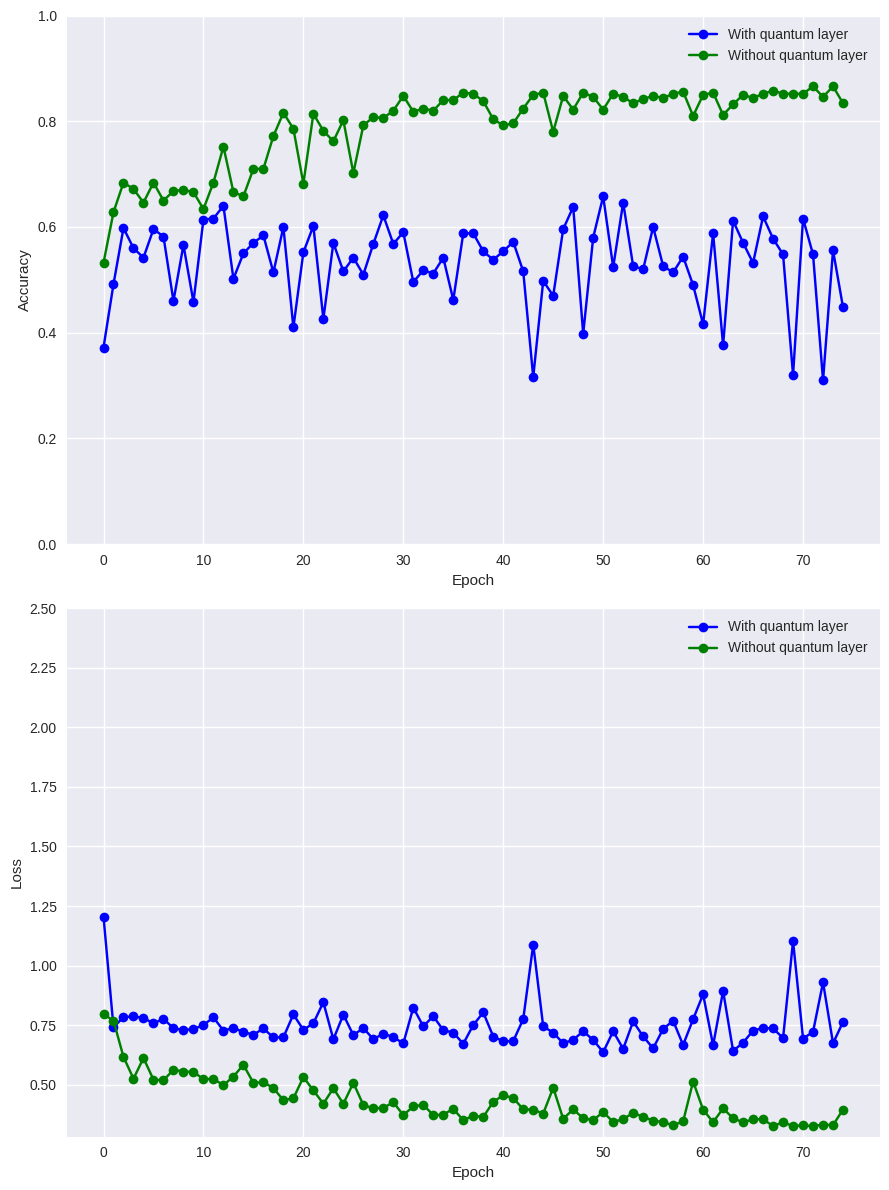

In [ ]:
plot_comparison(q_history_NN6_basis, c_history_NN6)

##Basic_NN5

###Quantum

In [ ]:
q_model_NN5_basis = MyModel5()

n_epochs = 75

q_history_NN5_basis = q_model_NN5_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4439 - accuracy: 0.2884 - val_loss: 1.2336 - val_accuracy: 0.4000 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 1.0594 - accuracy: 0.4656 - val_loss: 0.7861 - val_accuracy: 0.5800 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.9104 - accuracy: 0.4836 - val_loss: 0.7262 - val_accuracy: 0.5940 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 0.8755 - accuracy: 0.5124 - val_loss: 0.7443 - val_accuracy: 0.4440 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.8780 - accuracy: 0.5044 - val_loss: 0.7387 - val_accuracy: 0.4660 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.8464 - accuracy: 0.5268 - val_loss: 0.7301 - val_accuracy: 0.5680 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 0.8784 - accuracy: 0.5140 - val_loss: 0.7378 - val_accuracy: 0.5680 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 3s - loss: 0.8426 - accuracy: 0.5232 - val_loss: 0.7505 - val_accuracy: 0.5640 - 3s/epoch - 4ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN5_basis = np.argmax(q_model_NN5_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN5, q_precision_basis_NN5, q_recall_basis_NN5, q_accuracy_basis_NN5 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN5_basis)
print("F1 Score:", q_f1_basis_NN5)
print("Precision:", q_precision_basis_NN5)
print("Recall:", q_recall_basis_NN5)
print("Accuracy:", q_accuracy_basis_NN5)

F1 Score: 0.509622420523182
Precision: 0.7120653019707566
Recall: 0.558
Accuracy: 0.558


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


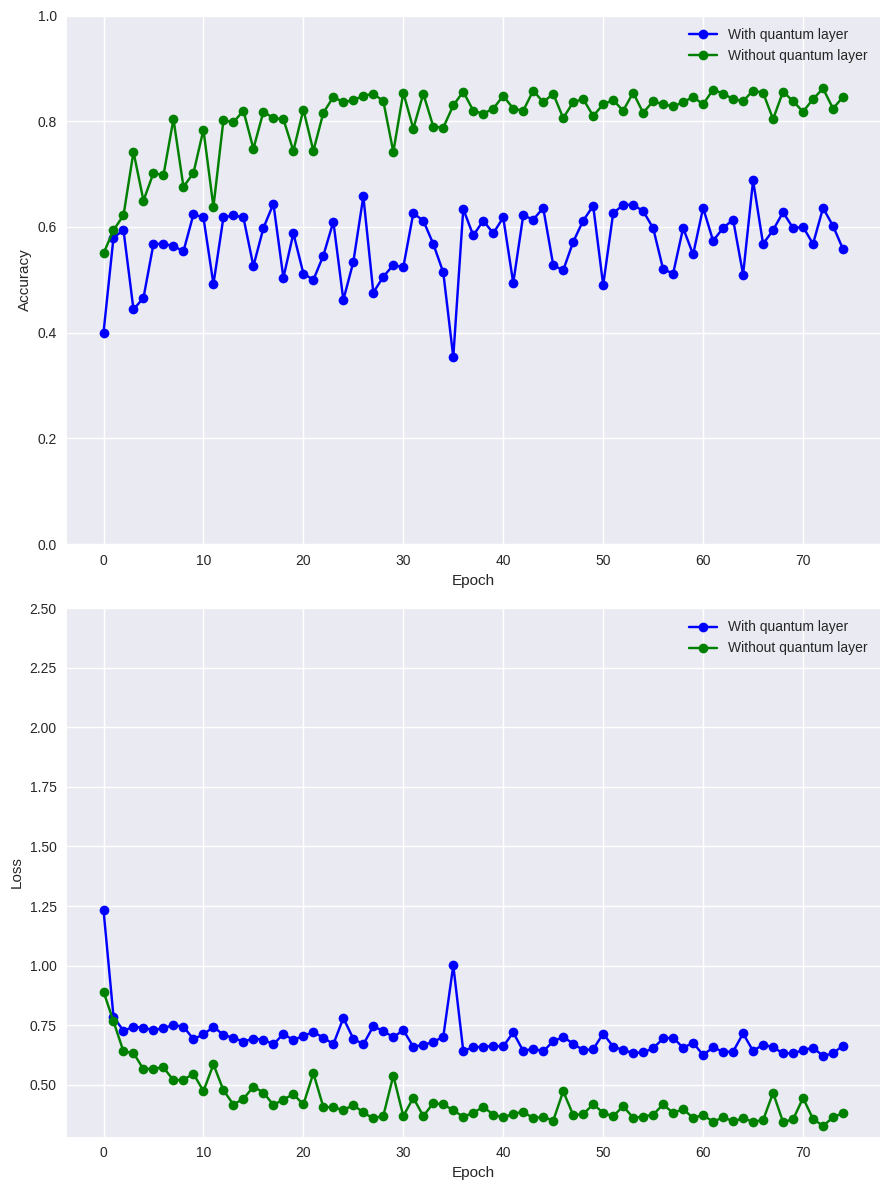

In [ ]:
plot_comparison(q_history_NN5_basis, c_history_NN5)

##Basic_NN4

###Quantum

In [ ]:
q_model_NN4_basis = MyModel4()

n_epochs = 75

q_history_NN4_basis = q_model_NN4_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4369 - accuracy: 0.2572 - val_loss: 1.3807 - val_accuracy: 0.2820 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3924 - accuracy: 0.2740 - val_loss: 1.3653 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3892 - accuracy: 0.2576 - val_loss: 1.3721 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3885 - accuracy: 0.2528 - val_loss: 1.3631 - val_accuracy: 0.2880 - 2s/epoch - 4ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3847 - accuracy: 0.2632 - val_loss: 1.3623 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 3s - loss: 1.3848 - accuracy: 0.2660 - val_loss: 1.3677 - val_accuracy: 0.2880 - 3s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3849 - accuracy: 0.2508 - val_loss: 1.3660 - val_accuracy: 0.2960 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.3867 - accuracy: 0.2552 - val_loss: 1.3665 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN4_basis = np.argmax(q_model_NN4_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 4ms/step


In [ ]:
4# Calculate classification metrics
q_f1_basis_NN4, q_precision_basis_NN4, q_recall_basis_NN4, q_accuracy_basis_NN4 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN4_basis)
print("F1 Score:", q_f1_basis_NN4)
print("Precision:", q_precision_basis_NN4)
print("Recall:", q_recall_basis_NN4)
print("Accuracy:", q_accuracy_basis_NN4)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


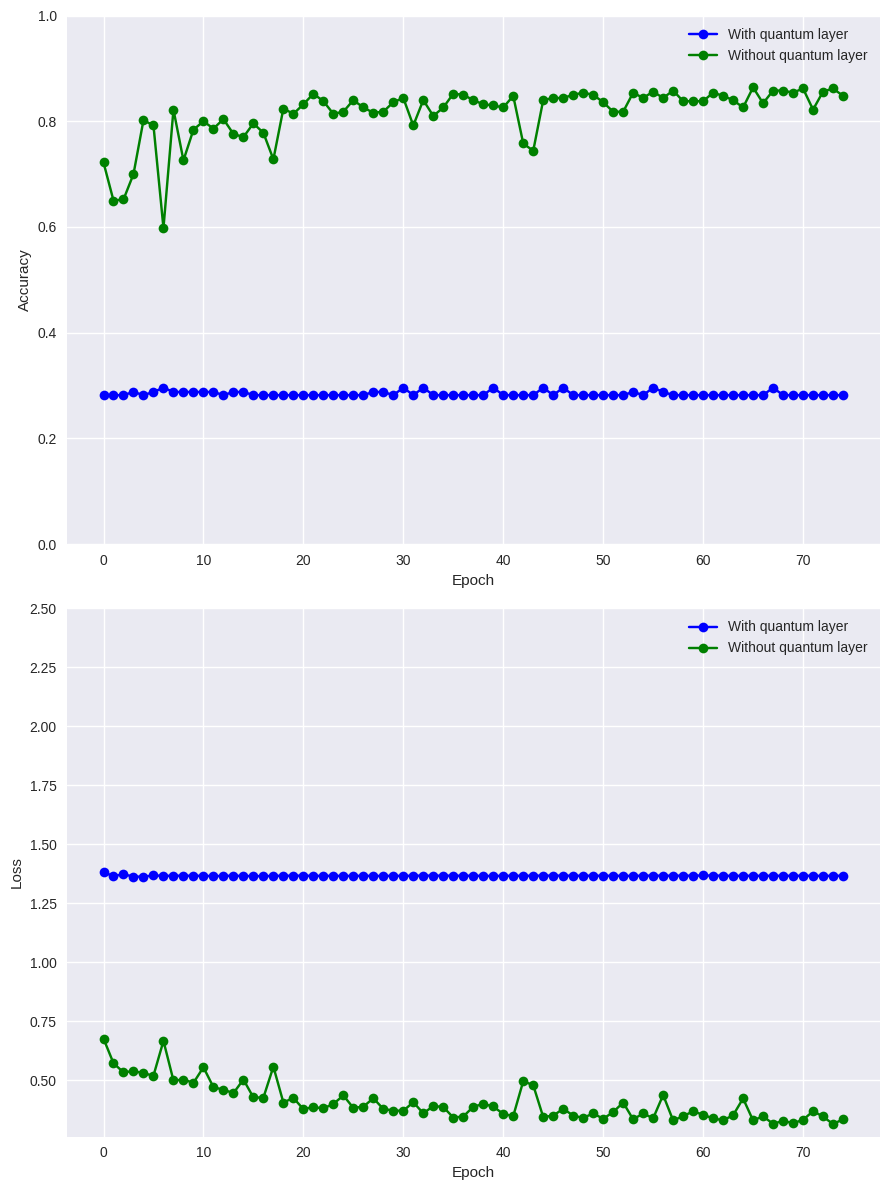

In [ ]:
plot_comparison(q_history_NN4_basis, c_history_NN4)

##Basic_NN3

###Quantum

In [ ]:
q_model_NN3_basis = MyModel3()

n_epochs = 75

q_history_NN3_basis = q_model_NN3_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4627 - accuracy: 0.2624 - val_loss: 1.3849 - val_accuracy: 0.2820 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 2s - loss: 1.3864 - accuracy: 0.2704 - val_loss: 1.3938 - val_accuracy: 0.2880 - 2s/epoch - 3ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3316 - accuracy: 0.2868 - val_loss: 1.1217 - val_accuracy: 0.3380 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.2469 - accuracy: 0.3772 - val_loss: 1.0196 - val_accuracy: 0.6300 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.1271 - accuracy: 0.4716 - val_loss: 0.9391 - val_accuracy: 0.6180 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.0424 - accuracy: 0.4888 - val_loss: 0.9398 - val_accuracy: 0.5780 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 2s - loss: 1.0224 - accuracy: 0.4940 - val_loss: 0.8614 - val_accuracy: 0.6000 - 2s/epoch - 4ms/step
Epoch 8/75
625/625 - 2s - loss: 0.9727 - accuracy: 0.4876 - val_loss: 0.8237 - val_accuracy: 0.5860 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN3_basis = np.argmax(q_model_NN3_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN3, q_precision_basis_NN3, q_recall_basis_NN3, q_accuracy_basis_NN3 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN3_basis)
print("F1 Score:", q_f1_basis_NN3)
print("Precision:", q_precision_basis_NN3)
print("Recall:", q_recall_basis_NN3)
print("Accuracy:", q_accuracy_basis_NN3)

F1 Score: 0.4433748732803706
Precision: 0.47936551701255825
Recall: 0.58
Accuracy: 0.58


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


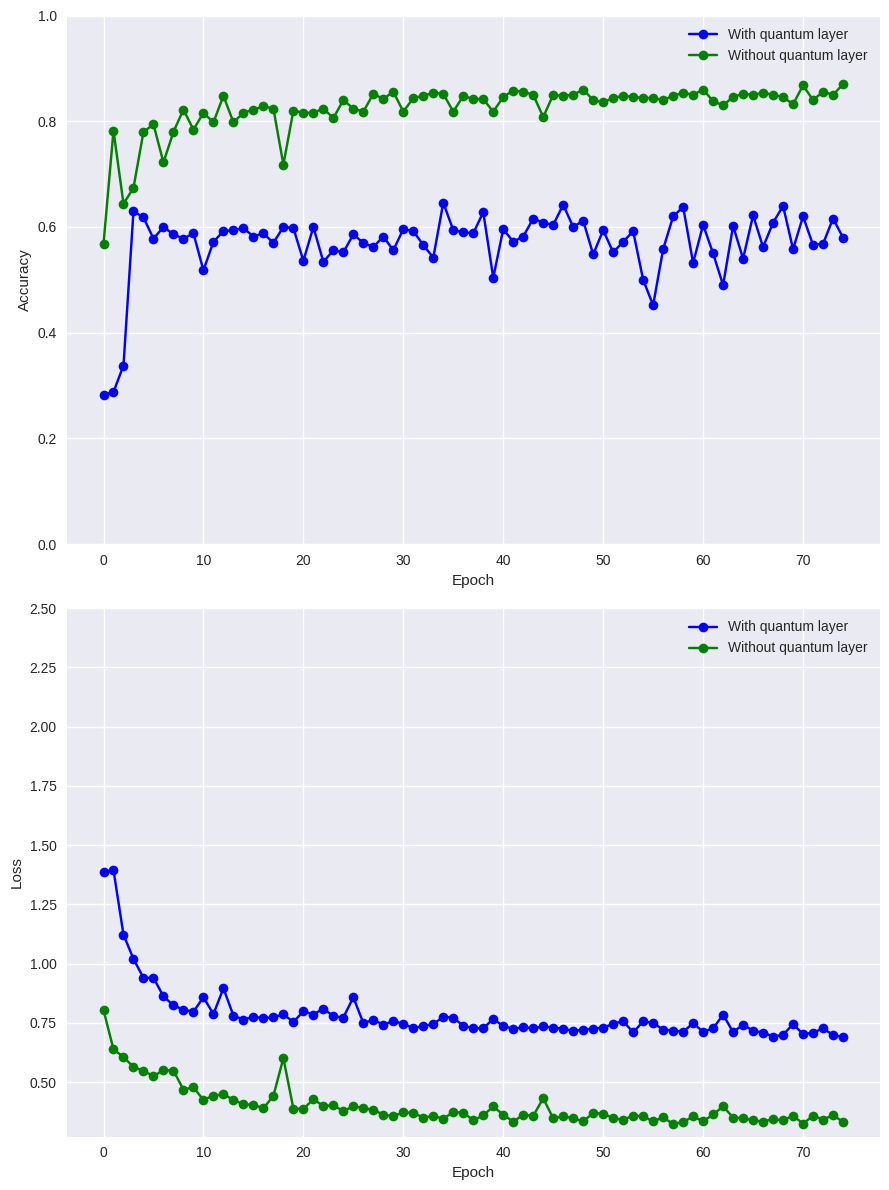

In [ ]:
plot_comparison(q_history_NN3_basis, c_history_NN3)

##Basic_NN2

###Quantum

In [ ]:
q_model_NN2_basis = MyModel2()

n_epochs = 75

q_history_NN2_basis = q_model_NN2_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 3s - loss: 1.3676 - accuracy: 0.2904 - val_loss: 1.1106 - val_accuracy: 0.5740 - 3s/epoch - 4ms/step
Epoch 2/75
625/625 - 2s - loss: 1.1256 - accuracy: 0.4252 - val_loss: 0.9129 - val_accuracy: 0.4360 - 2s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.0602 - accuracy: 0.4352 - val_loss: 0.8084 - val_accuracy: 0.5440 - 2s/epoch - 3ms/step
Epoch 4/75
625/625 - 2s - loss: 1.0581 - accuracy: 0.4424 - val_loss: 0.8211 - val_accuracy: 0.5720 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.0591 - accuracy: 0.4608 - val_loss: 0.8408 - val_accuracy: 0.4600 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.0387 - accuracy: 0.4672 - val_loss: 0.8128 - val_accuracy: 0.6400 - 2s/epoch - 4ms/step
Epoch 7/75
625/625 - 2s - loss: 1.0387 - accuracy: 0.4620 - val_loss: 0.7983 - val_accuracy: 0.6460 - 2s/epoch - 3ms/step
Epoch 8/75
625/625 - 2s - loss: 1.0363 - accuracy: 0.4720 - val_loss: 0.8125 - val_accuracy: 0.6280 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_NN2_basis = np.argmax(q_model_NN2_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN2, q_precision_basis_NN2, q_recall_basis_NN2, q_accuracy_basis_NN2 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN2_basis)
print("F1 Score:", q_f1_basis_NN2)
print("Precision:", q_precision_basis_NN2)
print("Recall:", q_recall_basis_NN2)
print("Accuracy:", q_accuracy_basis_NN2)

F1 Score: 0.451696867964395
Precision: 0.40908538011695905
Recall: 0.536
Accuracy: 0.536


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


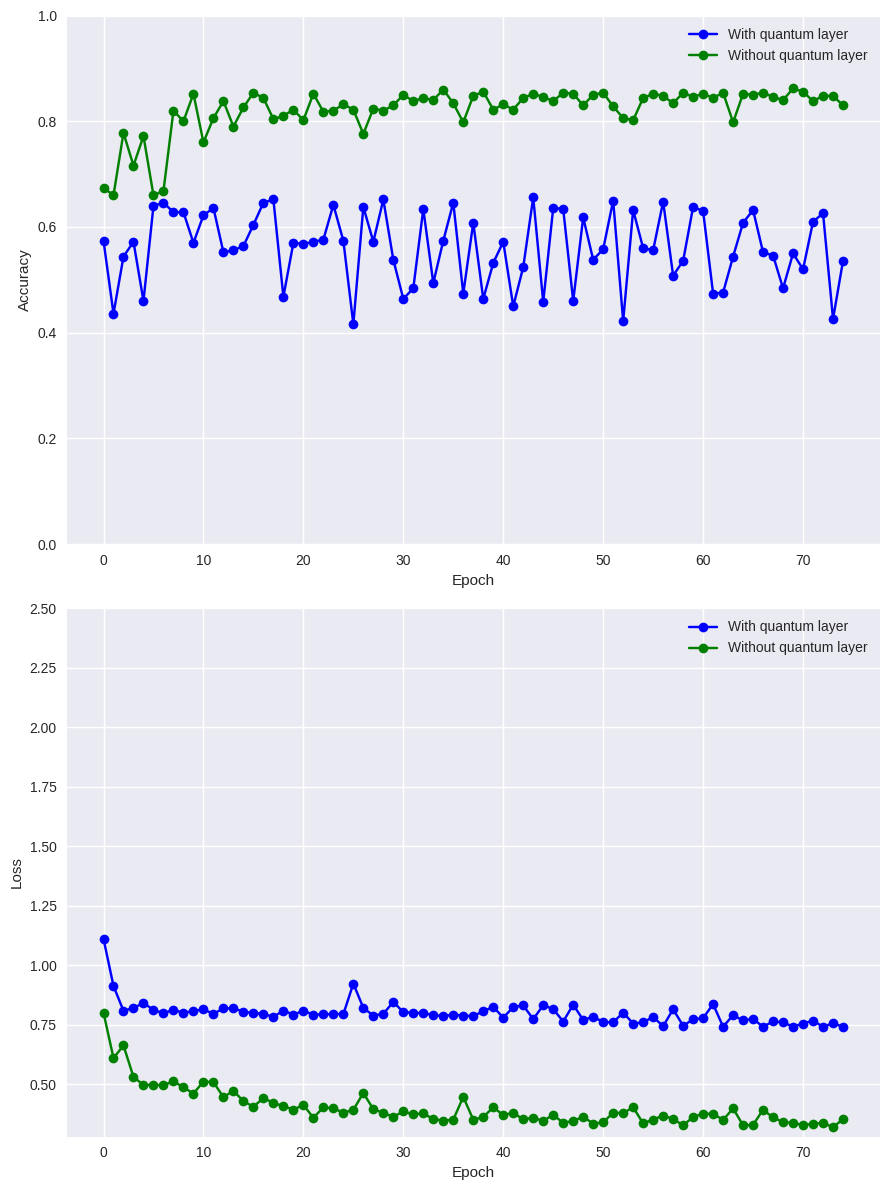

In [ ]:
plot_comparison(q_history_NN2_basis, c_history_NN2)

##Basic_NN1

###Quantum

In [ ]:
q_model_NN1_basis = MyModel1()

n_epochs = 75

q_history_NN1_basis = q_model_NN1_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.3868 - accuracy: 0.2640 - val_loss: 1.3739 - val_accuracy: 0.2820 - 2s/epoch - 4ms/step
Epoch 2/75
625/625 - 1s - loss: 1.3834 - accuracy: 0.2584 - val_loss: 1.3691 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 2s - loss: 1.3832 - accuracy: 0.2564 - val_loss: 1.3677 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 4/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2500 - val_loss: 1.3674 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 1.3849 - accuracy: 0.2548 - val_loss: 1.3670 - val_accuracy: 0.2820 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2532 - val_loss: 1.3670 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 7/75
625/625 - 2s - loss: 1.3831 - accuracy: 0.2588 - val_loss: 1.3671 - val_accuracy: 0.2820 - 2s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 1.3831 - accuracy: 0.2492 - val_loss: 1.3668 - val_accuracy: 0.2820 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN1_basis = np.argmax(q_model_NN1_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN1, q_precision_basis_NN1, q_recall_basis_NN1, q_accuracy_basis_NN1 = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN1_basis)
print("F1 Score:", q_f1_basis_NN1)
print("Precision:", q_precision_basis_NN1)
print("Recall:", q_recall_basis_NN1)
print("Accuracy:", q_accuracy_basis_NN1)

F1 Score: 0.12406240249609983
Precision: 0.07952399999999998
Recall: 0.282
Accuracy: 0.282


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


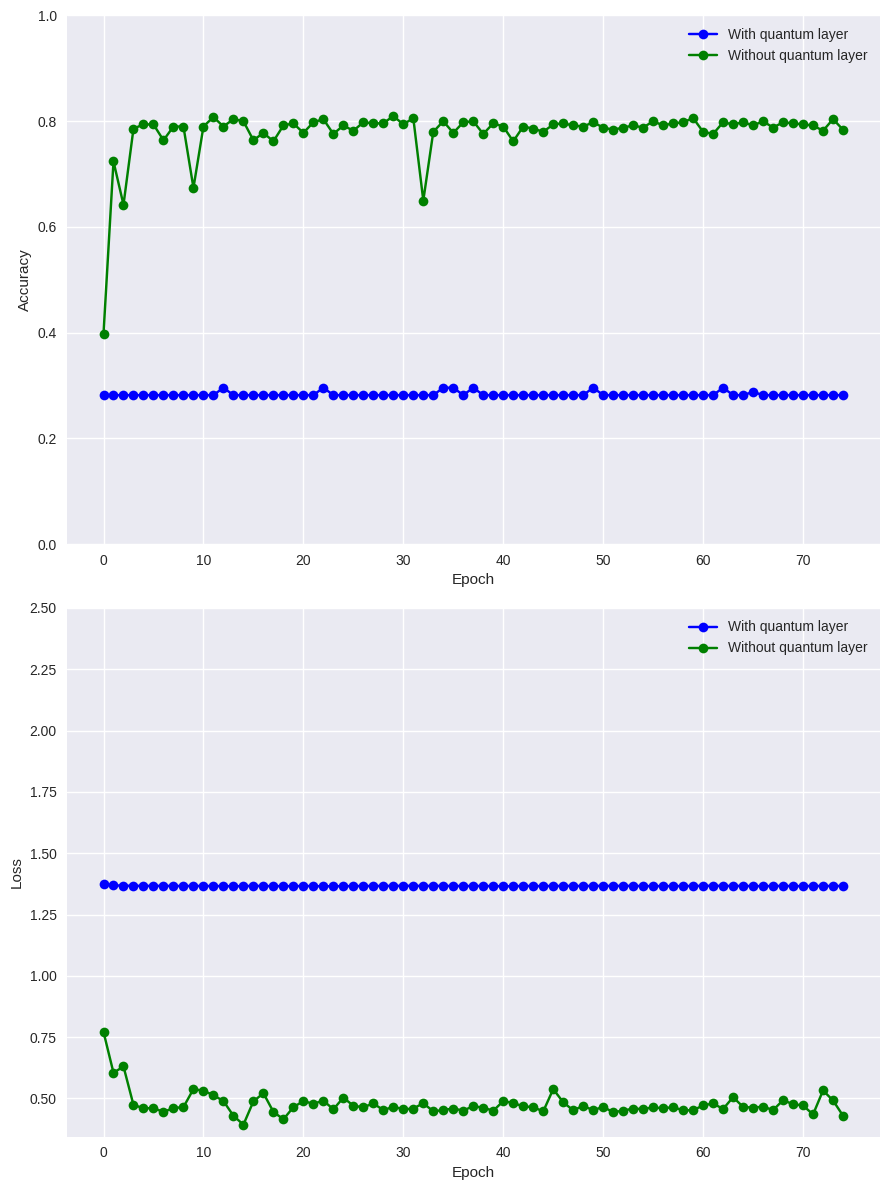

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##Basic_NN

###Quantum

In [ ]:
q_model_NN_basis = MyModel()

n_epochs = 75

q_history_NN_basis = q_model_NN_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 2s - loss: 1.2033 - accuracy: 0.4820 - val_loss: 1.3518 - val_accuracy: 0.5580 - 2s/epoch - 3ms/step
Epoch 2/75
625/625 - 1s - loss: 1.0172 - accuracy: 0.5108 - val_loss: 1.0804 - val_accuracy: 0.5120 - 1s/epoch - 2ms/step
Epoch 3/75
625/625 - 1s - loss: 0.9686 - accuracy: 0.5352 - val_loss: 1.0937 - val_accuracy: 0.3960 - 1s/epoch - 2ms/step
Epoch 4/75
625/625 - 1s - loss: 1.0186 - accuracy: 0.5436 - val_loss: 0.8418 - val_accuracy: 0.4540 - 1s/epoch - 2ms/step
Epoch 5/75
625/625 - 2s - loss: 0.9337 - accuracy: 0.5608 - val_loss: 1.3078 - val_accuracy: 0.4180 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.9205 - accuracy: 0.5616 - val_loss: 0.8469 - val_accuracy: 0.4740 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 1s - loss: 0.9266 - accuracy: 0.5728 - val_loss: 1.0338 - val_accuracy: 0.5840 - 1s/epoch - 2ms/step
Epoch 8/75
625/625 - 1s - loss: 0.9601 - accuracy: 0.5532 - val_loss: 0.7702 - val_accuracy: 0.6020 - 1s/epoch - 2ms/step
Epoch 9/75
625/625 - 1s 

In [ ]:
q_y_pred_NN_basis = np.argmax(q_model_NN_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_basis_NN, q_precision_basis_NN, q_recall_basis_NN, q_accuracy_basis_NN = calculate_classification_metrics(q_test_label_basis, q_y_pred_NN_basis)
print("F1 Score:", q_f1_basis_NN)
print("Precision:", q_precision_basis_NN)
print("Recall:", q_recall_basis_NN)
print("Accuracy:", q_accuracy_basis_NN)

F1 Score: 0.6222562551222482
Precision: 0.7312626170294825
Recall: 0.644
Accuracy: 0.644


###Graph

<ipython-input-21-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


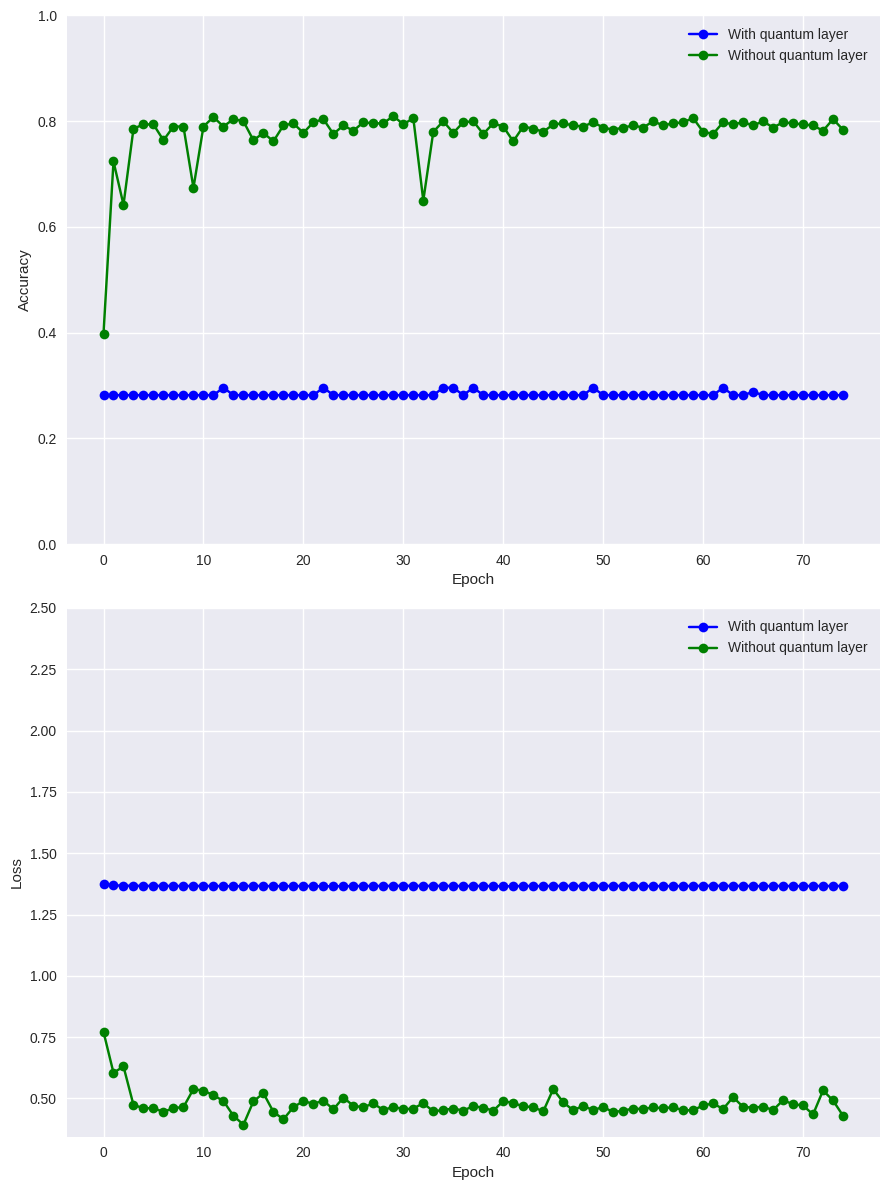

In [ ]:
plot_comparison(q_history_NN1_basis, c_history_NN1)

##CNN

###Quantum

In [ ]:
q_CNN_model_basis = MyCNNModel()

n_epochs = 75

q_history_CNN_basis = q_CNN_model_basis.fit(
    q_train_color_images_basis,
    q_train_label_basis,
    validation_data=(q_test_color_images_basis, q_test_label_basis),
    batch_size=4,
    epochs=n_epochs,
    verbose=2,
)

Epoch 1/75
625/625 - 4s - loss: 1.4533 - accuracy: 0.2588 - val_loss: 1.3924 - val_accuracy: 0.2820 - 4s/epoch - 6ms/step
Epoch 2/75
625/625 - 3s - loss: 1.1292 - accuracy: 0.3840 - val_loss: 0.7369 - val_accuracy: 0.5860 - 3s/epoch - 4ms/step
Epoch 3/75
625/625 - 2s - loss: 0.7930 - accuracy: 0.5276 - val_loss: 0.7315 - val_accuracy: 0.5480 - 2s/epoch - 4ms/step
Epoch 4/75
625/625 - 2s - loss: 0.7532 - accuracy: 0.5584 - val_loss: 0.7499 - val_accuracy: 0.5000 - 2s/epoch - 3ms/step
Epoch 5/75
625/625 - 2s - loss: 0.7334 - accuracy: 0.5656 - val_loss: 0.7640 - val_accuracy: 0.5000 - 2s/epoch - 3ms/step
Epoch 6/75
625/625 - 2s - loss: 0.7051 - accuracy: 0.5848 - val_loss: 0.6665 - val_accuracy: 0.5980 - 2s/epoch - 3ms/step
Epoch 7/75
625/625 - 3s - loss: 0.7006 - accuracy: 0.5832 - val_loss: 0.7191 - val_accuracy: 0.5800 - 3s/epoch - 5ms/step
Epoch 8/75
625/625 - 2s - loss: 0.6981 - accuracy: 0.5880 - val_loss: 0.6374 - val_accuracy: 0.6460 - 2s/epoch - 3ms/step
Epoch 9/75
625/625 - 2s 

In [ ]:
q_y_pred_CNN_basis = np.argmax(q_CNN_model_basis.predict(q_test_color_images_basis), axis=1)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Calculate classification metrics
q_f1_CNN_basis, q_precision_CNN_basis, q_recall_CNN_basis, q_accuracy_CNN_basis = calculate_classification_metrics(q_test_label_basis, q_y_pred_CNN_basis)
print("F1 Score:", q_f1_CNN_basis)
print("Precision:", q_precision_CNN_basis)
print("Recall:", q_recall_CNN_basis)
print("Accuracy:", q_accuracy_CNN_basis)

F1 Score: 0.7367667465103969
Precision: 0.8359004644554289
Recall: 0.766
Accuracy: 0.766


###Graph

<ipython-input-15-0563a2e7009a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


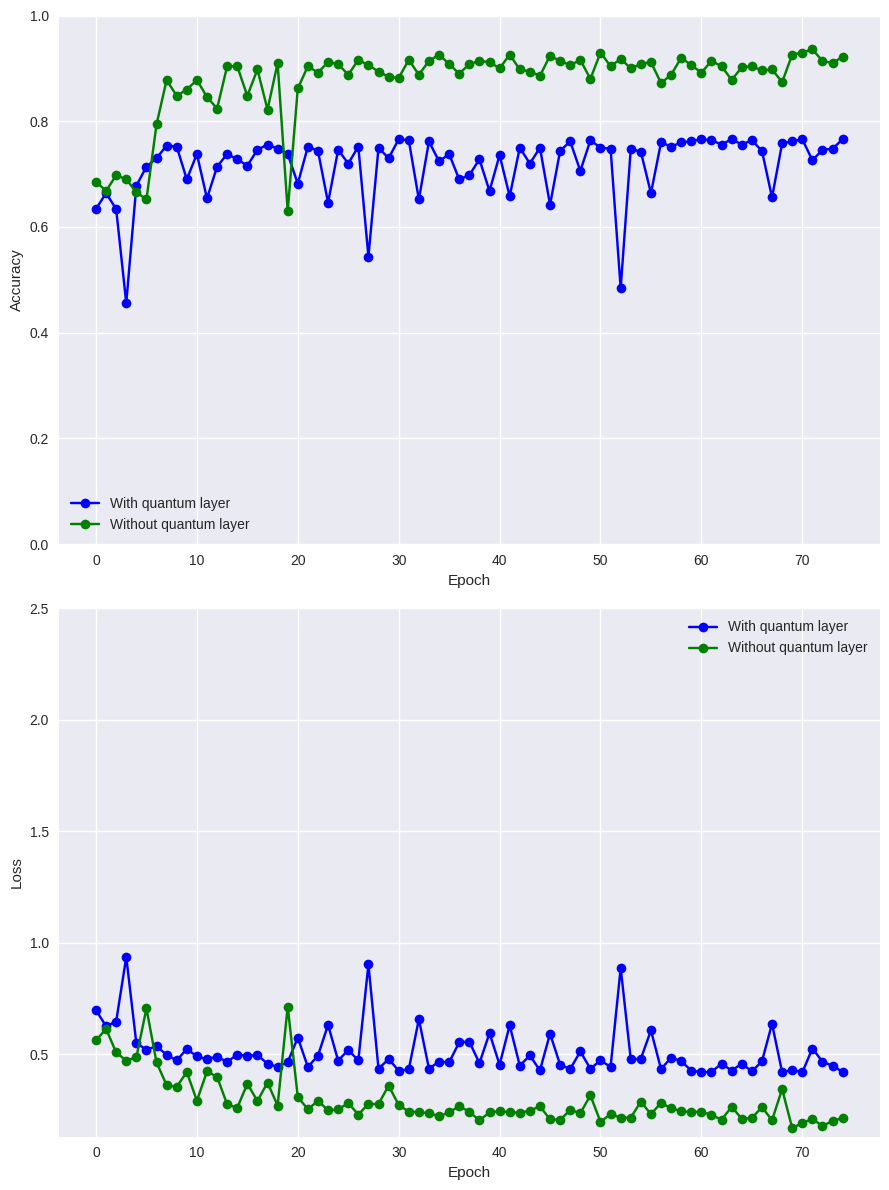

In [ ]:
plot_comparison(q_history_CNN_basis, c_history_CNN)

##SVM

###Quantum

In [ ]:
# Reshape the input data to flatten the color channels
q_train_color_images_basis_flattened = q_train_color_images_basis.reshape(q_train_color_images_basis.shape[0], -1)
q_test_color_images_basis_flattened = q_test_color_images_basis.reshape(q_test_color_images_basis.shape[0], -1)

In [ ]:
q_svm_model_basis = MySVMModel()

n_epochs = 75

q_svm_history_basis = q_svm_model_basis.fit(
    q_train_color_images_basis_flattened,
    q_train_label_basis
)

In [ ]:
q_y_predSVM_basis = q_svm_model_basis.predict(q_test_color_images_basis_flattened)

In [ ]:
# Calculate classification metrics
q_f1_SVM_basis, q_precision_SVM_basis, q_recall_SVM_basis, q_accuracy_SVM_basis = calculate_classification_metrics(q_test_label_basis, q_y_predSVM_basis)
print("F1 Score:", q_f1_SVM_basis)
print("Precision:", q_precision_SVM_basis)
print("Recall:", q_recall_SVM_basis)
print("Accuracy:", q_accuracy_SVM_basis)

F1 Score: 0.7552713058864942
Precision: 0.7873964648748281
Recall: 0.762
Accuracy: 0.762
